# Andrucci simulation

The Andrucci roulette strategy is a high-risk approach to the popular table game. This strategy relies on the idea that although roulette is a game of chance, over time numbers will have phases where they appear more regularly.

In [1]:
from roulette import Roulette
from collections import Counter
import random
from simulations_core import *
from simulations_plots_core import *

roulette = Roulette()

The following code works on the following way: Make sure you note down exactly which number the ball lands on each time when watching the roulette 30-37 times. Over the 30-37 bets, see which numbers appear the most and then begin making straight bets on one of the popular numbers. Repeat this bet on the same number for around 30-37 bets.

In [2]:
def andrucci_betting(goal_money_won, bet, money_limit):
    watch_bets = random.randint(30,37)
    numbers_chosen = [roulette.spin() for _ in range(watch_bets)]
    counts = Counter(numbers_chosen)
    sorted = counts.most_common()
    play_on = random.randint(0,len(sorted)//2)
    money = 0
    money_history = [money]

    while money < goal_money_won:
        money += roulette.make_specific_single_bet(bet, sorted[play_on][0])
        money_history.append(money)

        if money_limit is not None and money < money_limit:
            return money_history

    return money_history

In [3]:
money_goals = [10, 100, 500, 1000]

## Starting bet = 1, Allowed money lost = -35

In [4]:
bet = 1
money_histories = simulate_different_goal_money(
                    betting_type = andrucci_betting, 
                    goal_money_list = money_goals, 
                    number_histories = 10000,
                    start_bet= bet,
                    money_limit=-35*bet)


In [5]:
successful_histories = get_successful_histories(money_histories, money_goals)

In [6]:
for goal in money_goals:
    print(f"For goal {goal} mean money won:")
    print(get_mean_money_won(money_histories, goal))

For goal 10 mean money won:
24.30487599122659
For goal 100 mean money won:
111.34337616304829
For goal 500 mean money won:
510.63577586206895
For goal 1000 mean money won:
1010.9871794871794


### Analysis when the goal is to win 10 units

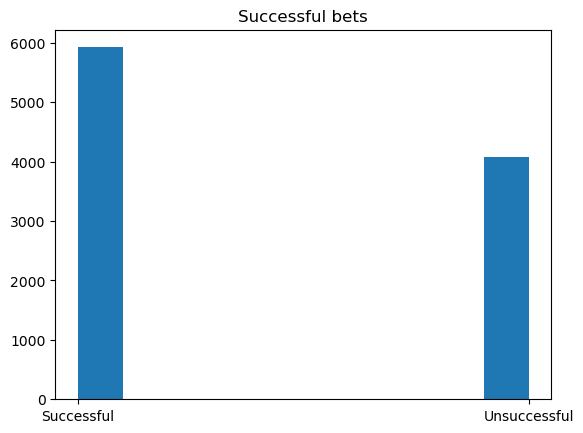

In [7]:
plot_successful_bets(money_histories[10], 10)

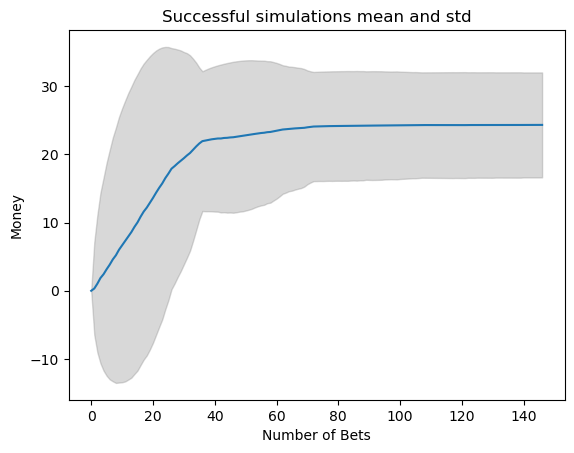

In [8]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, 10)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

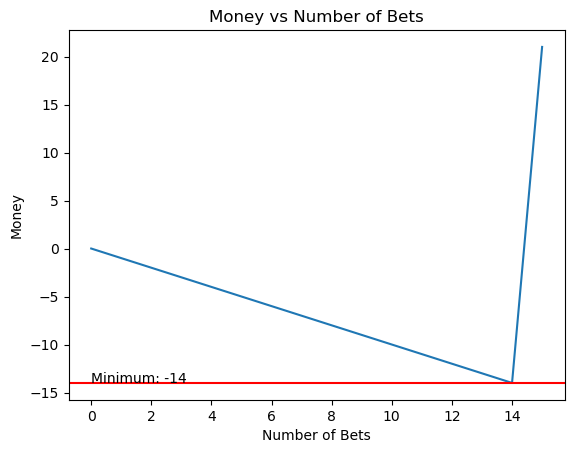

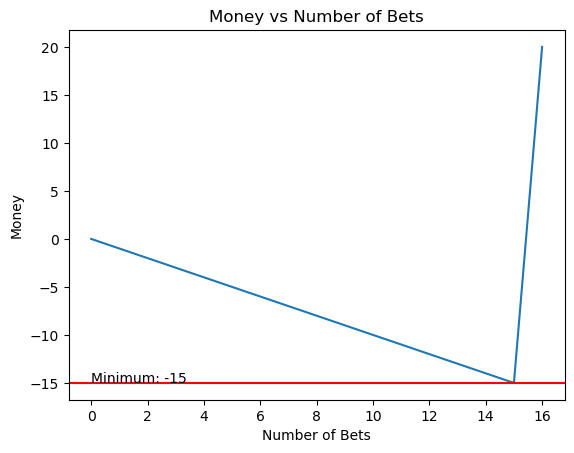

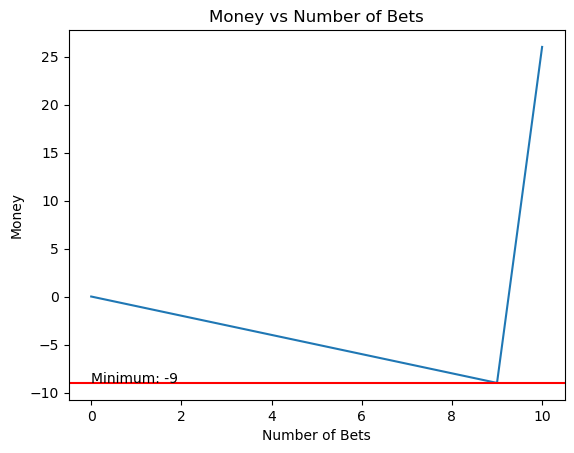

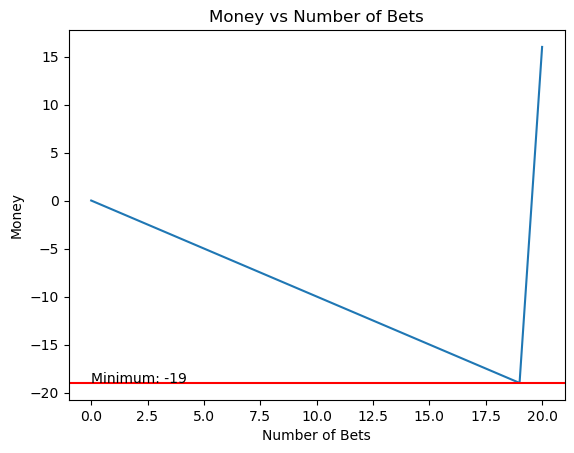

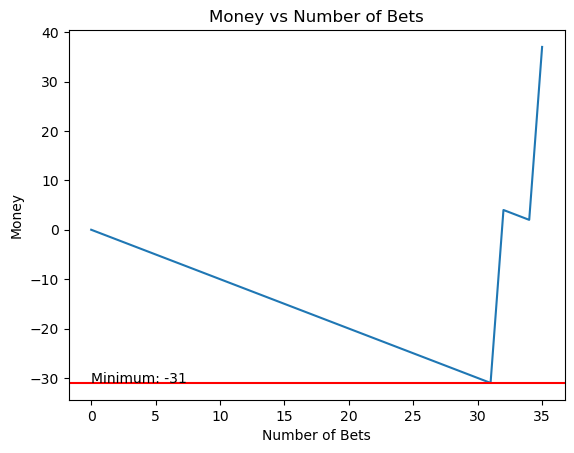

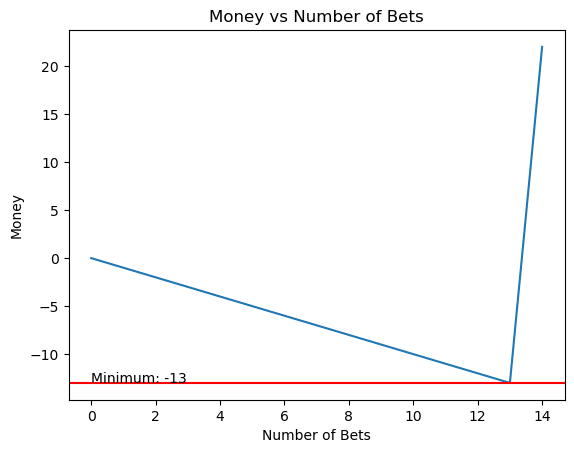

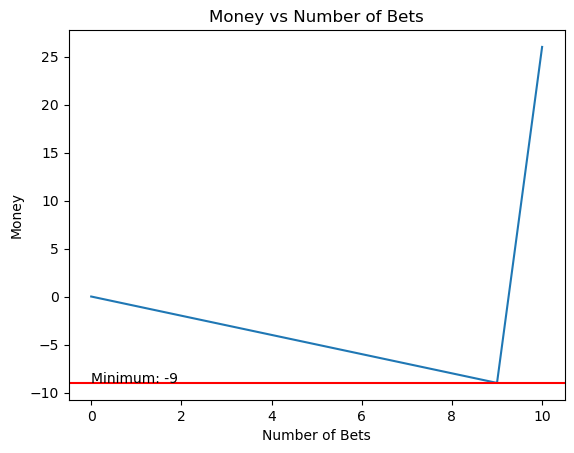

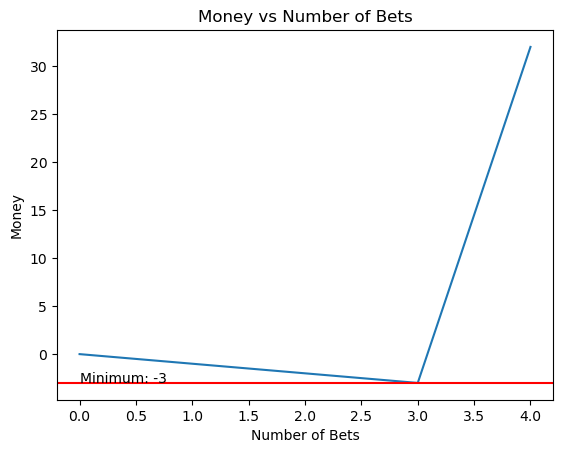

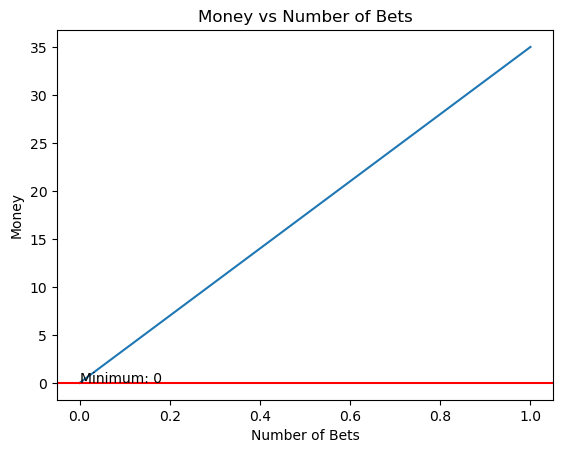

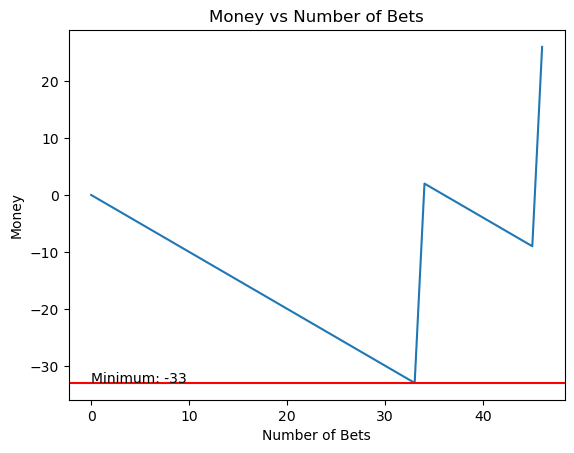

In [9]:
plot_money_histories(successful_histories, 10)

### Analysis when the goal is to win 100 units

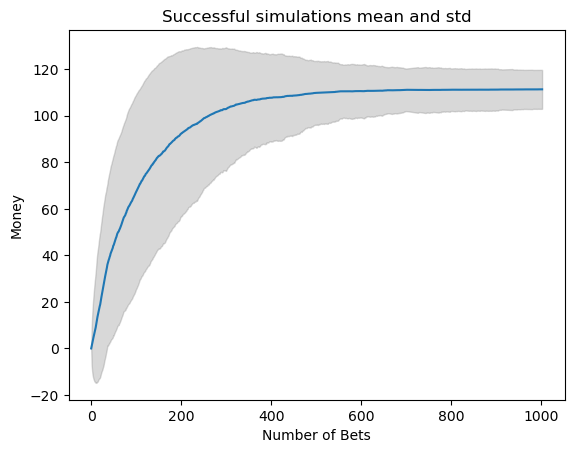

In [10]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, 100)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

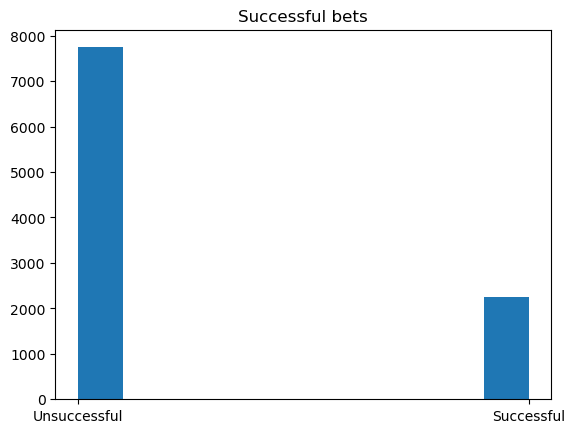

In [11]:
plot_successful_bets(money_histories[100], 100)

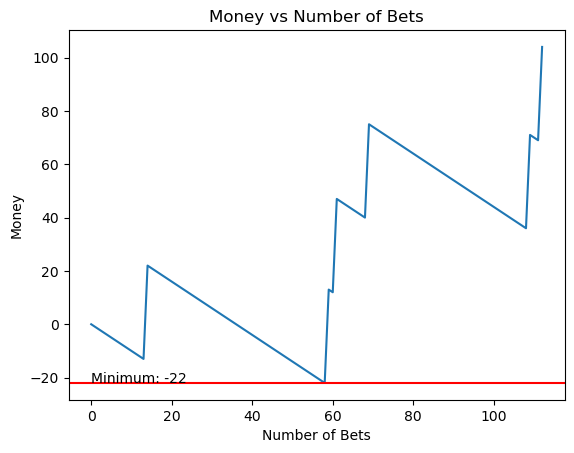

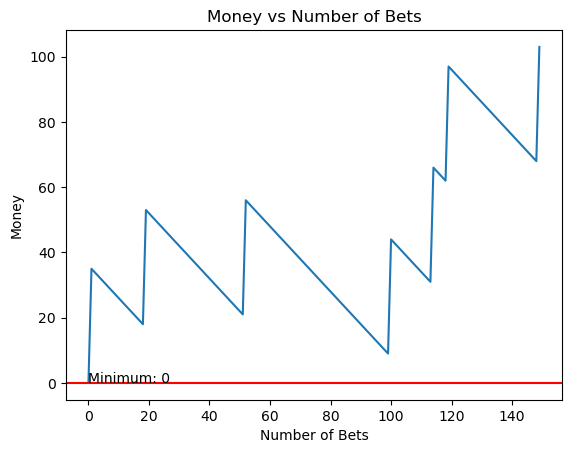

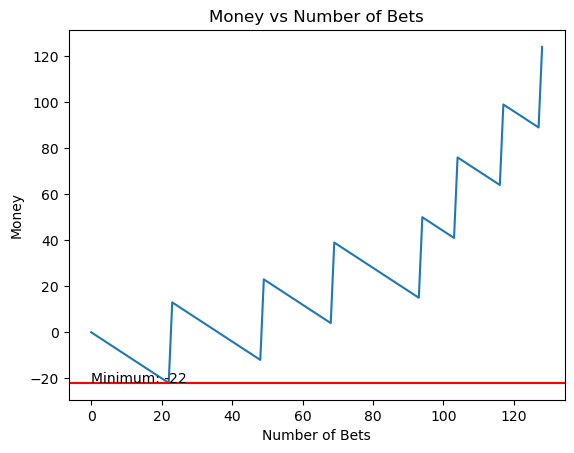

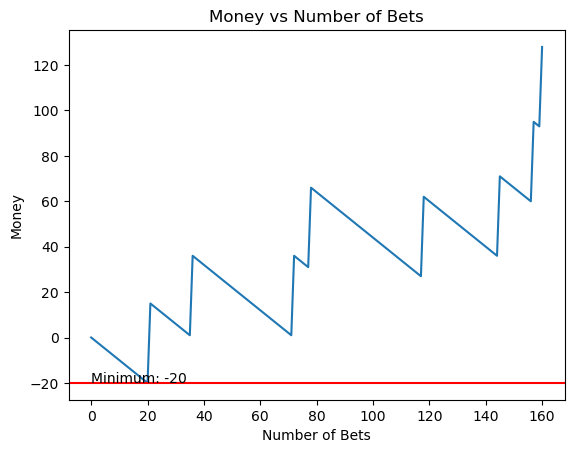

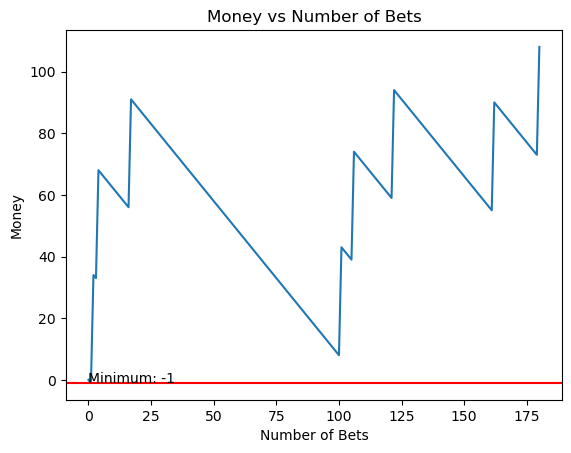

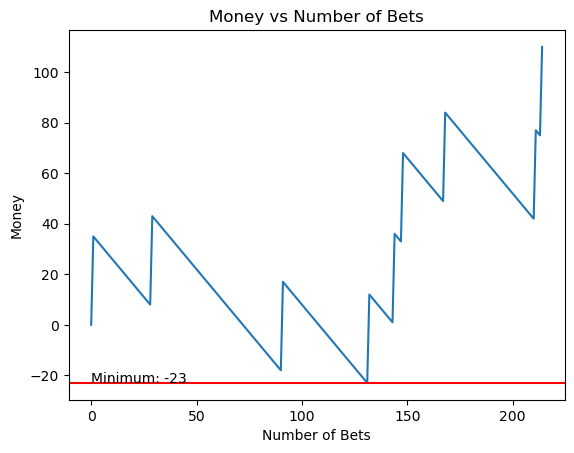

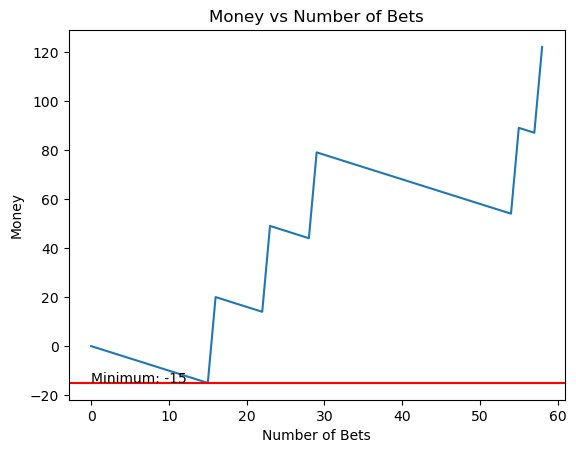

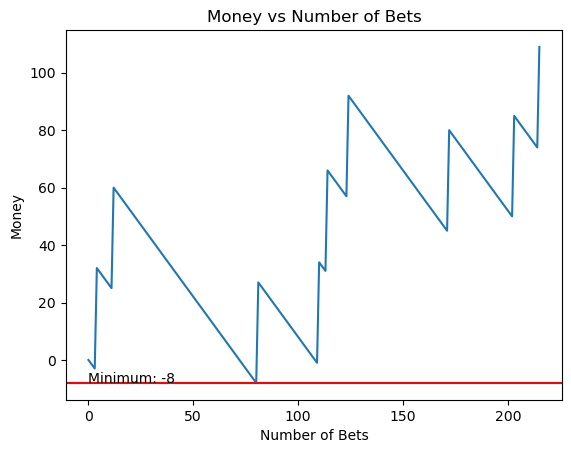

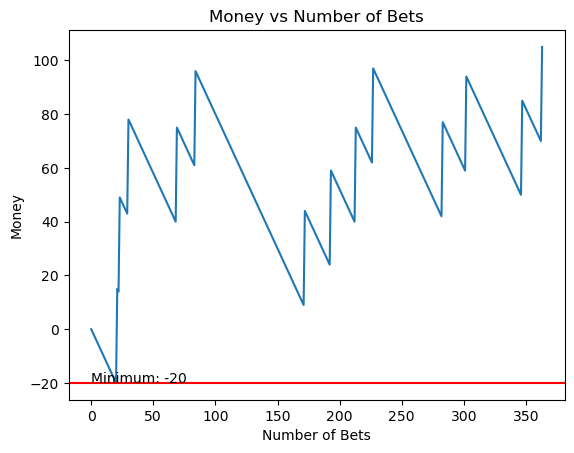

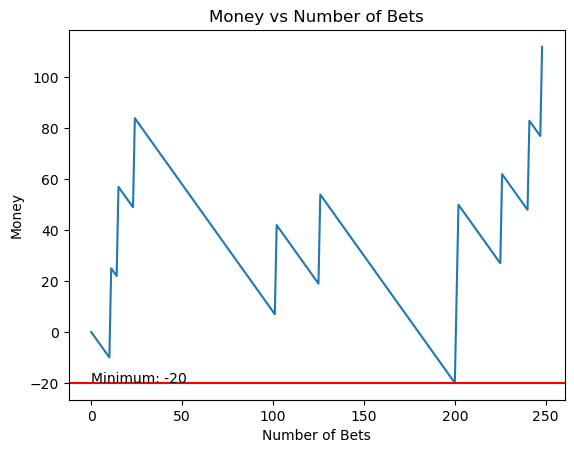

In [12]:
plot_money_histories(successful_histories, 100)

### Analysis when the goal is to win 500 units

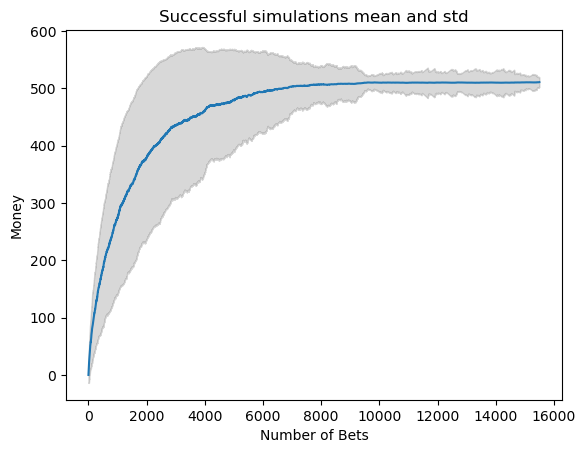

In [13]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, 500)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

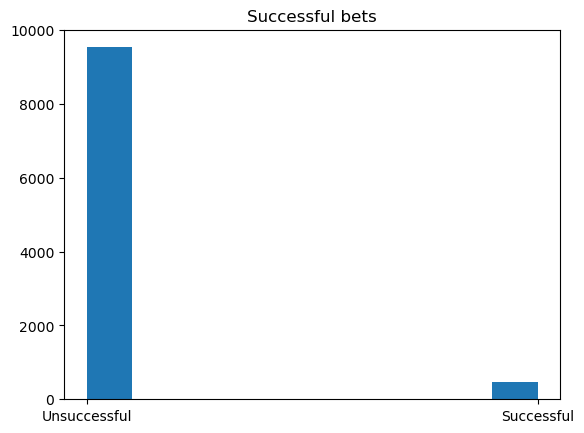

In [14]:
plot_successful_bets(money_histories[500], 500)

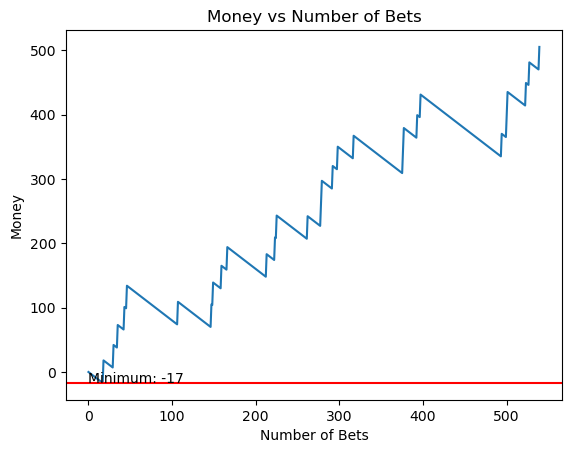

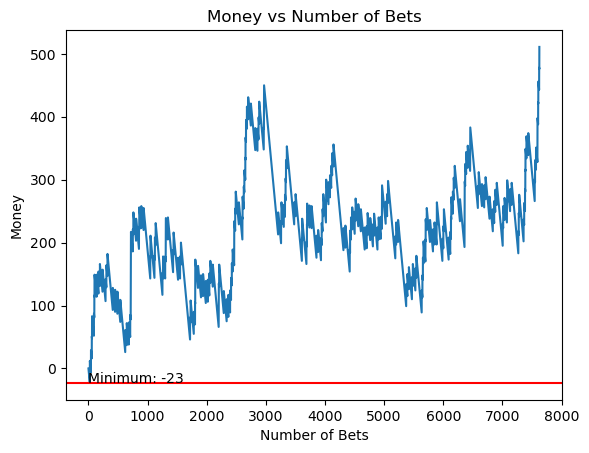

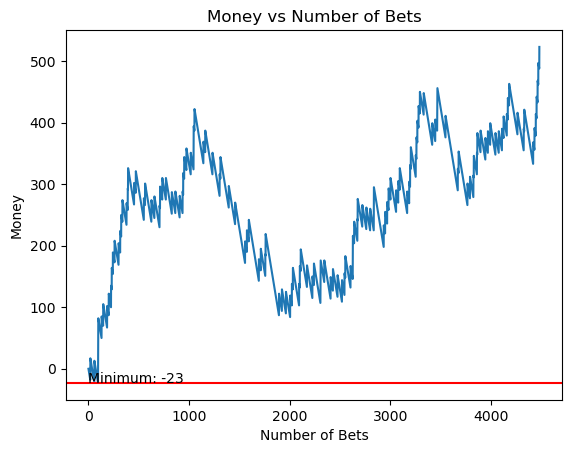

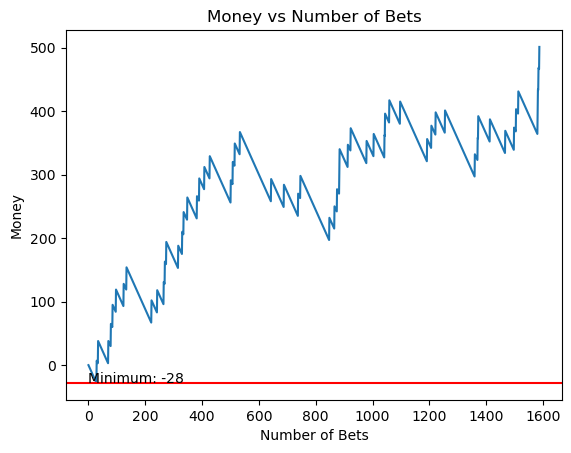

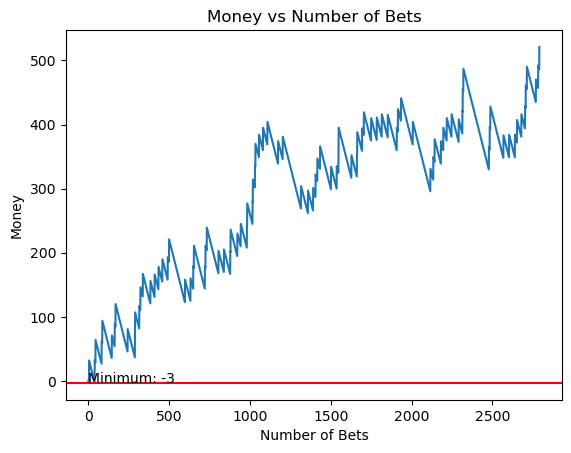

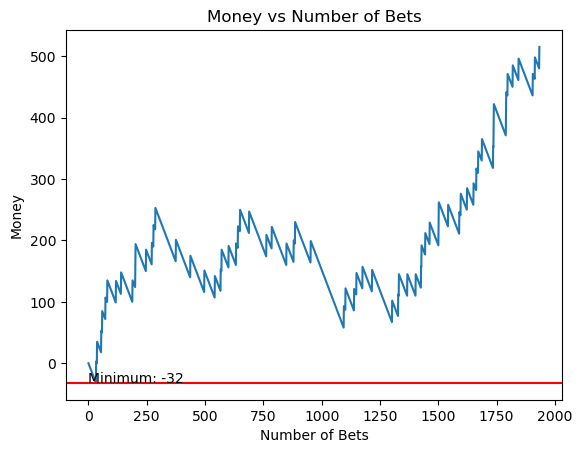

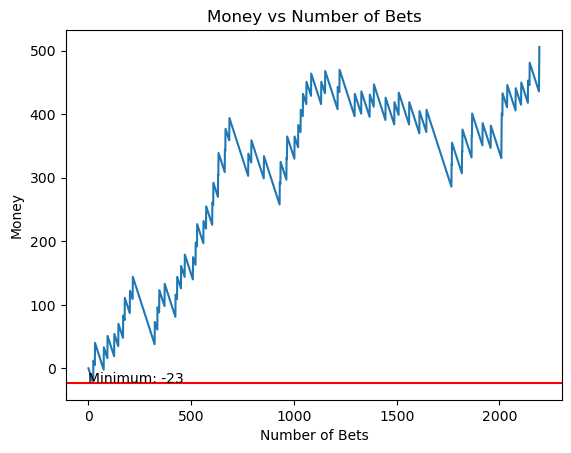

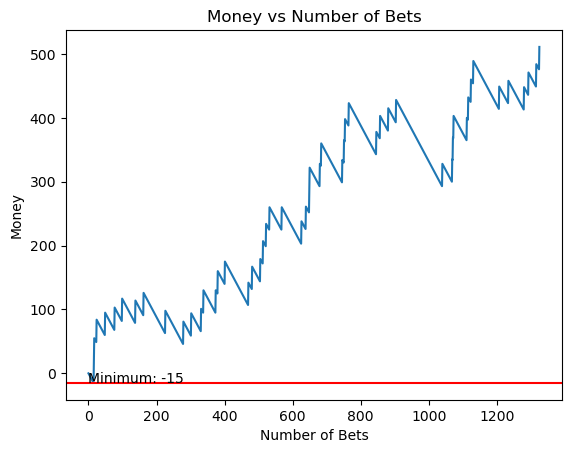

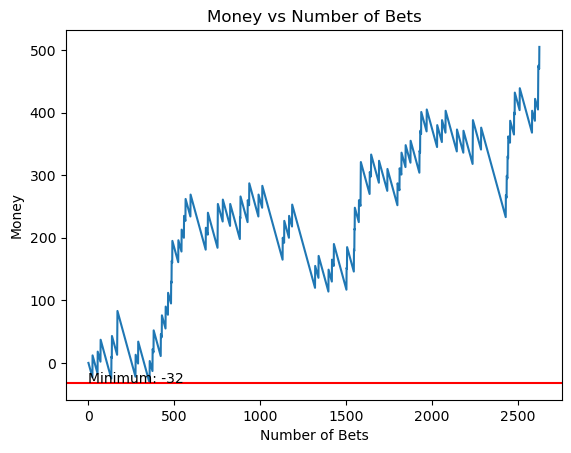

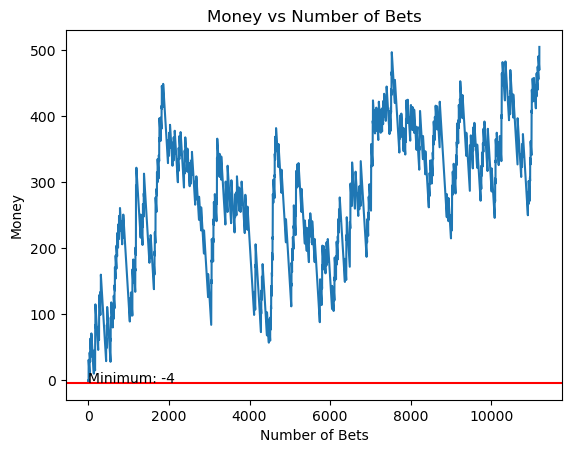

In [15]:
plot_money_histories(successful_histories, 500)

### Analysis when the goal is to win 1000 units

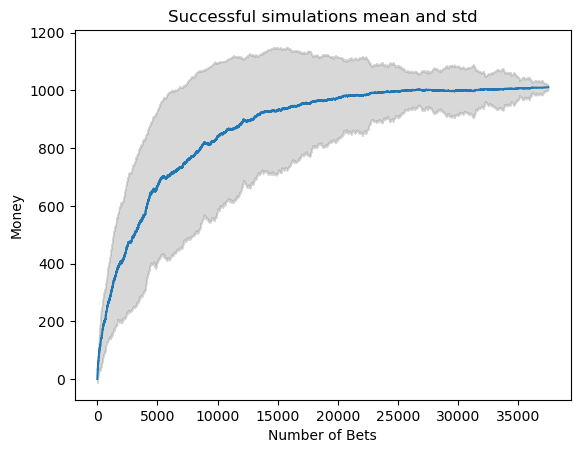

In [16]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, 1000)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

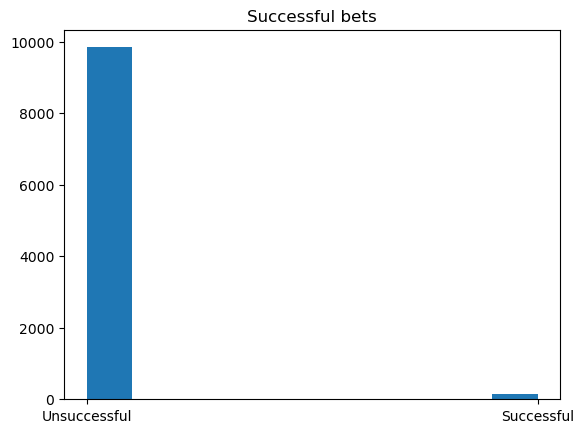

In [17]:
plot_successful_bets(money_histories[1000], 1000)

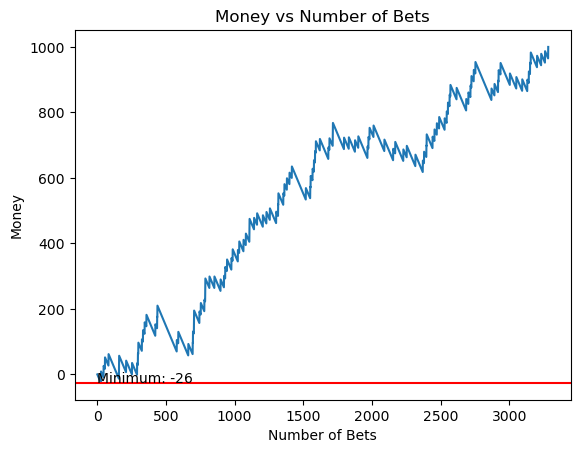

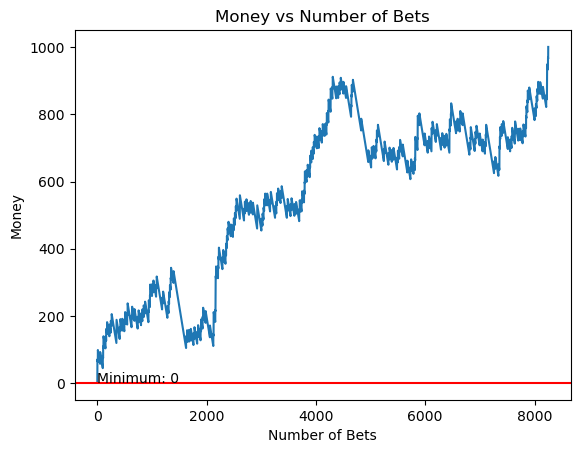

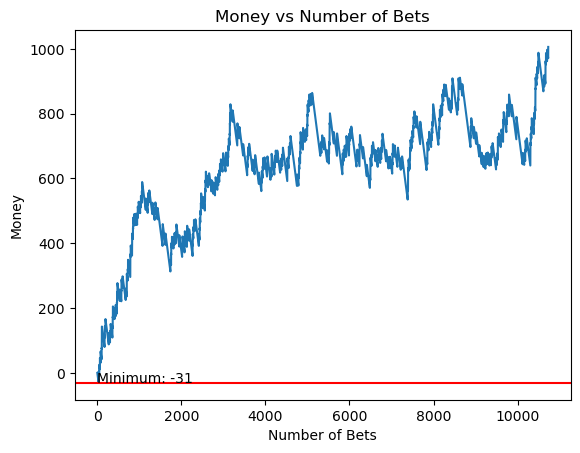

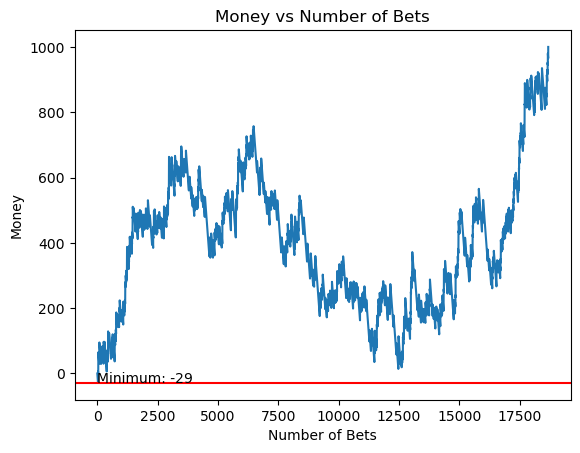

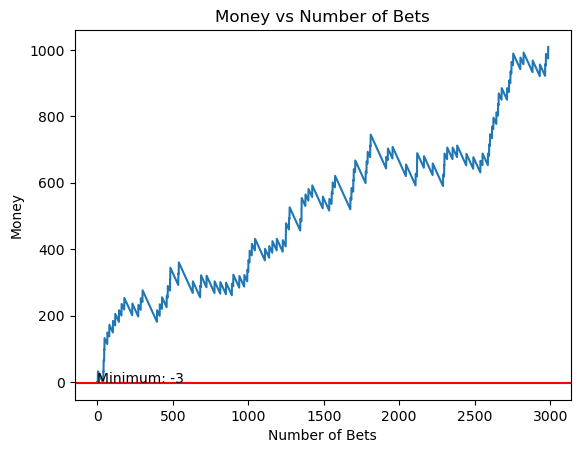

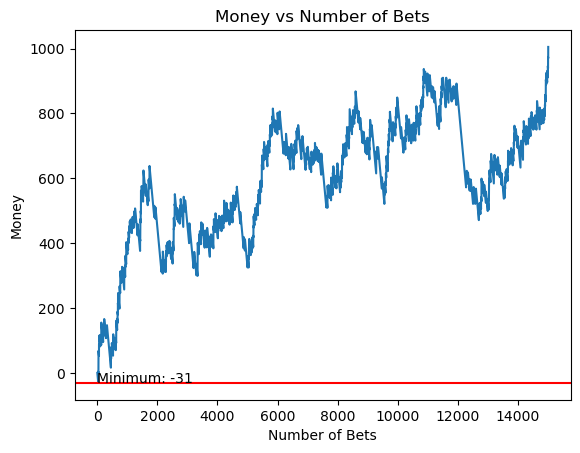

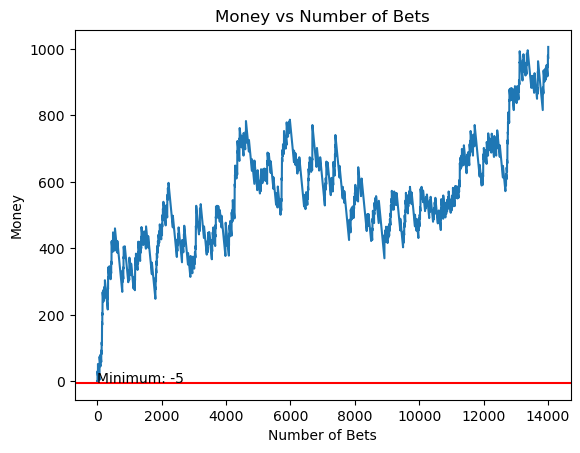

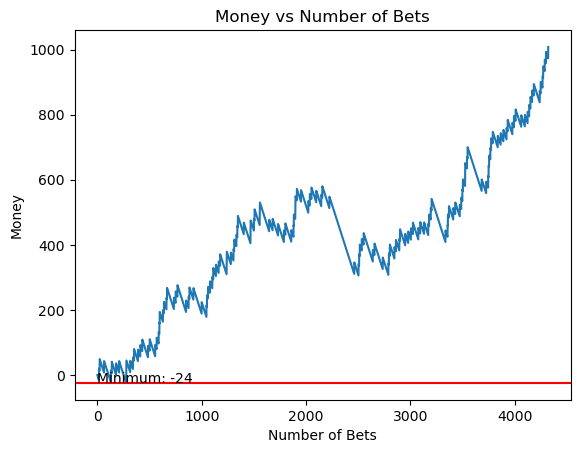

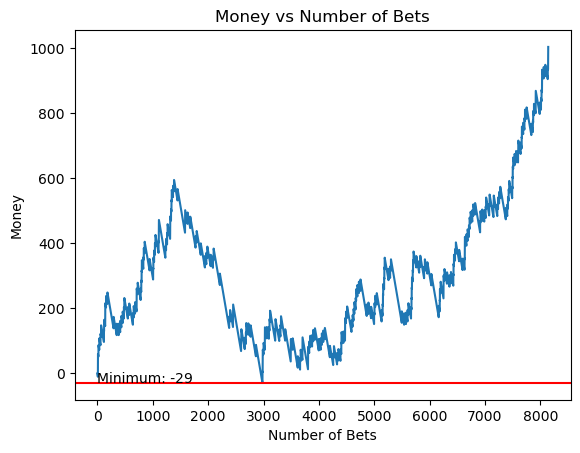

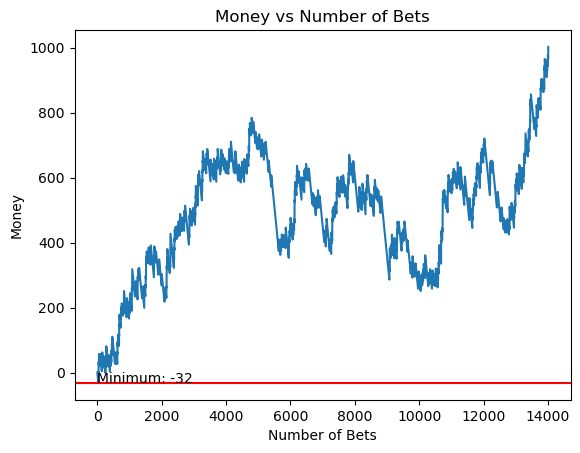

In [18]:
plot_money_histories(successful_histories, 1000)

## Starting bet = goal, Allowed money lost = -10*goal

In [19]:
money_histories = dict()
for goal in money_goals:
    bet = goal
    tmp_money_histories = simulate_different_goal_money(
                        betting_type = andrucci_betting, 
                        goal_money_list = [goal], 
                        number_histories = 10000,
                        start_bet= bet,
                        money_limit= -10*bet)
    money_histories = money_histories | tmp_money_histories

In [20]:
successful_histories = get_successful_histories(money_histories, money_goals)

In [21]:
for goal in money_goals:
    print(f"For goal {goal} mean money won:")
    print(get_mean_money_won(money_histories, goal))

For goal 10 mean money won:
302.97520661157023
For goal 100 mean money won:
3024.079754601227
For goal 500 mean money won:
15167.248062015504
For goal 1000 mean money won:
30265.02311248074


### Analysis when the goal is to win 10 units

In [22]:
UNITS = 10

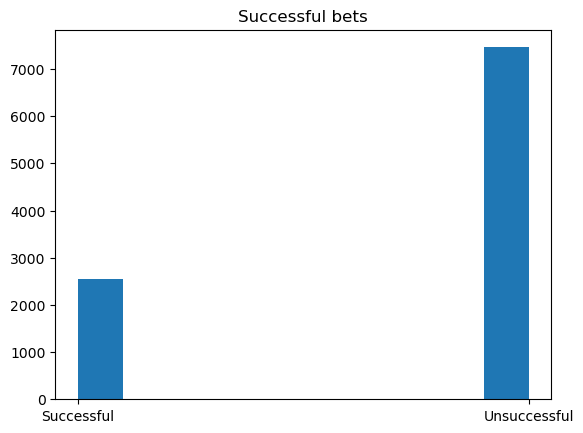

In [23]:
plot_successful_bets(money_histories[UNITS], UNITS)

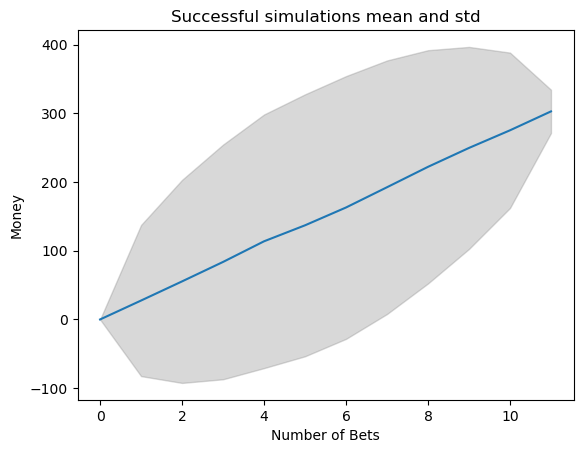

In [24]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

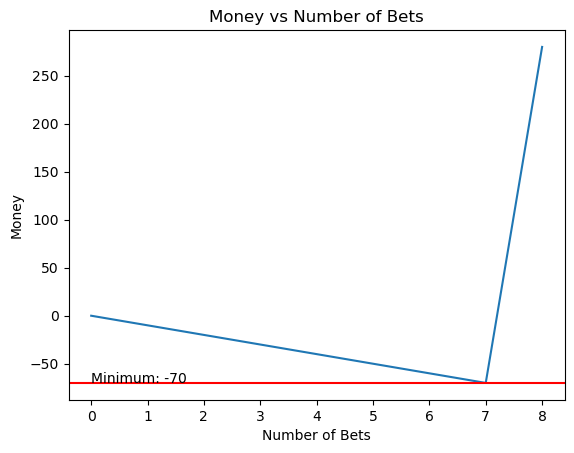

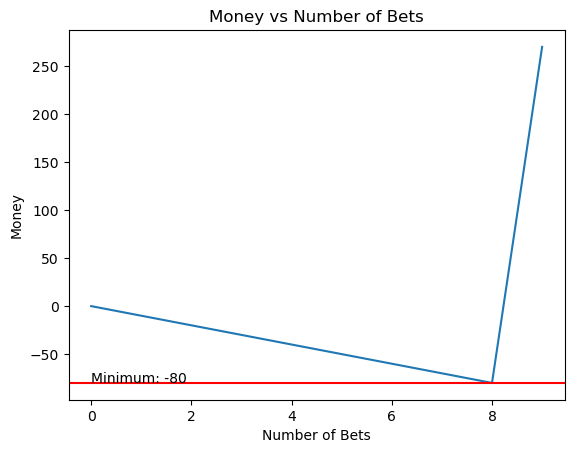

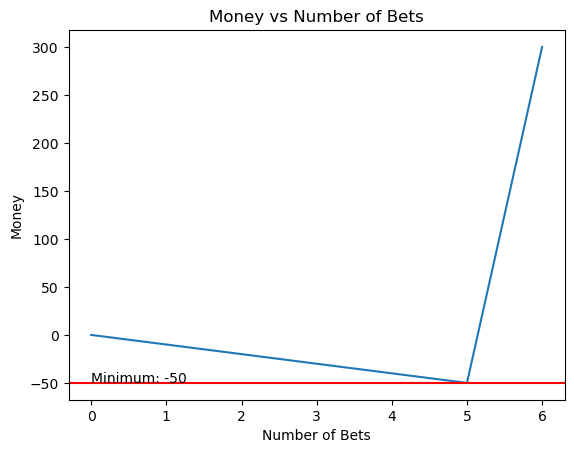

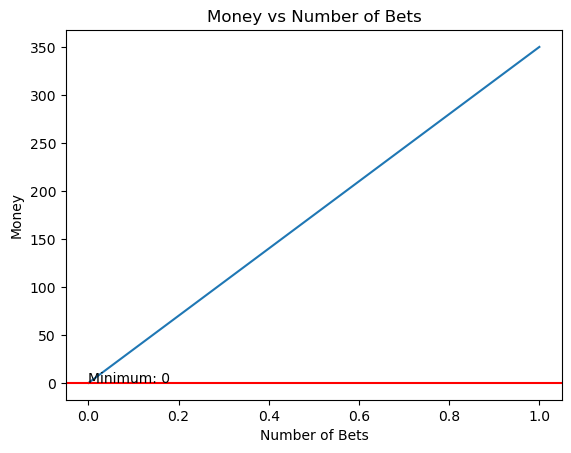

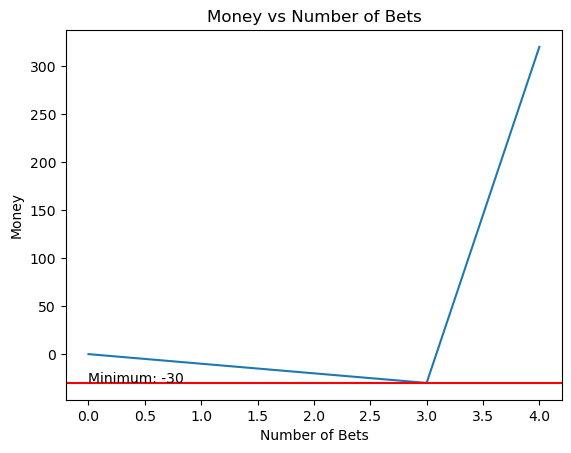

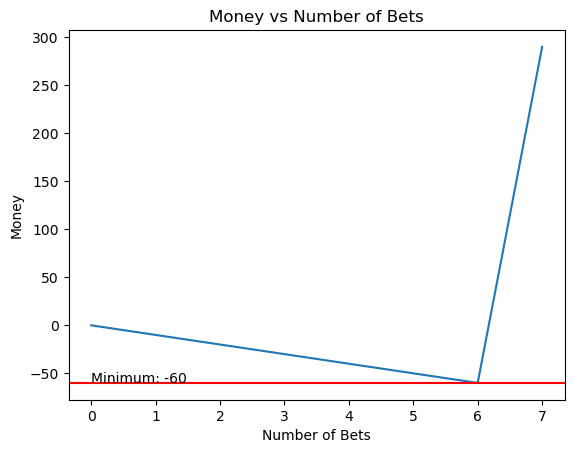

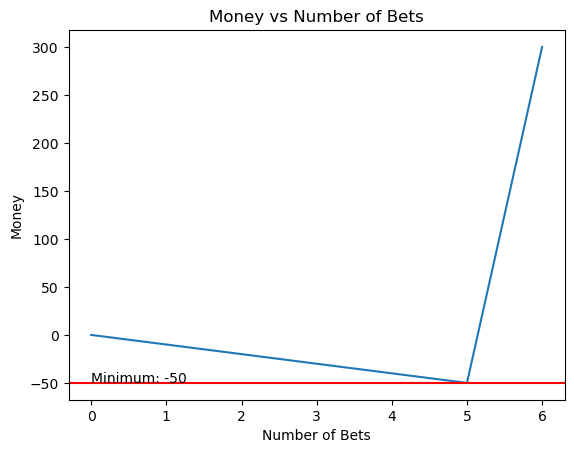

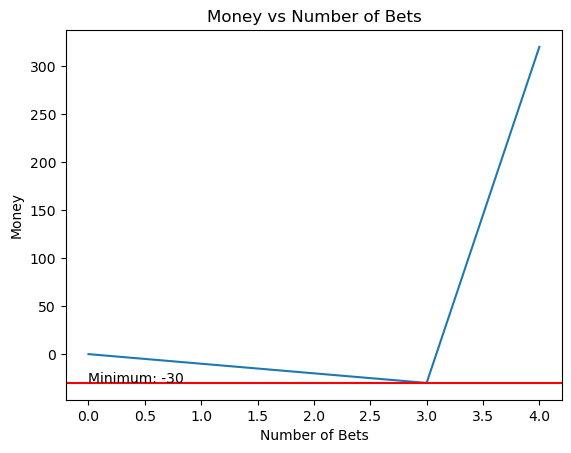

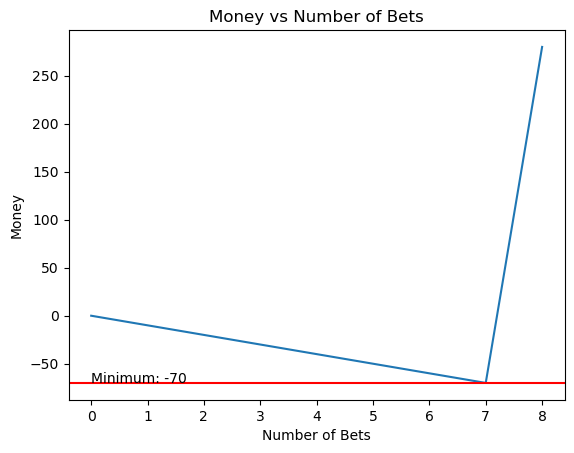

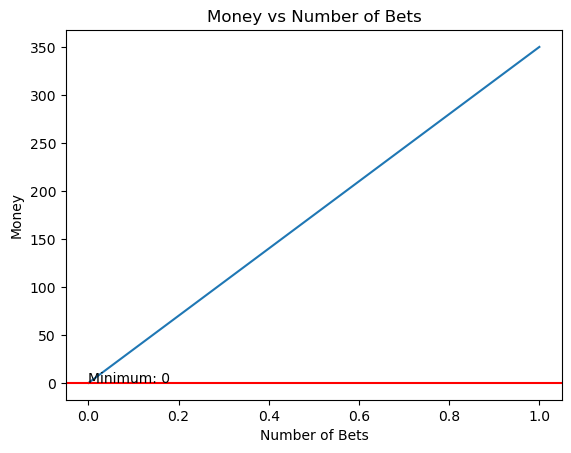

In [25]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 100 units

In [26]:
UNITS = 100

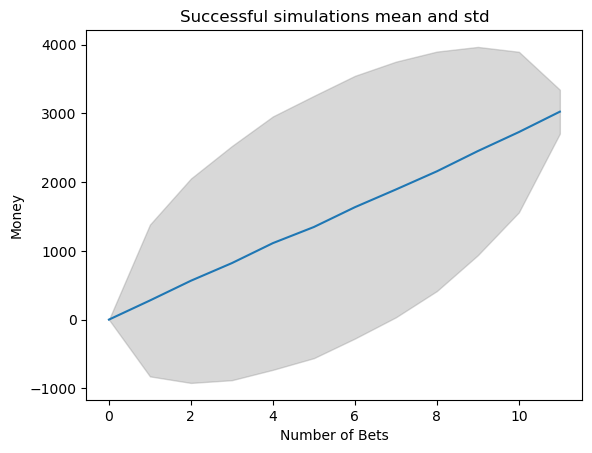

In [27]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

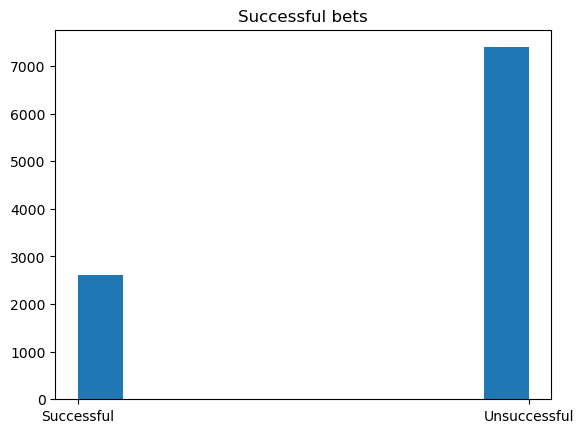

In [28]:
plot_successful_bets(money_histories[UNITS], UNITS)

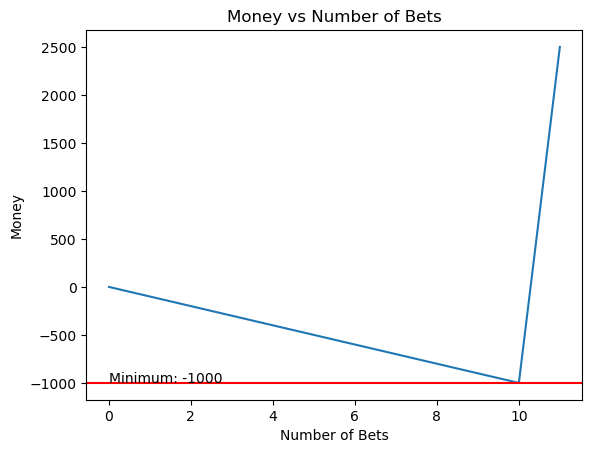

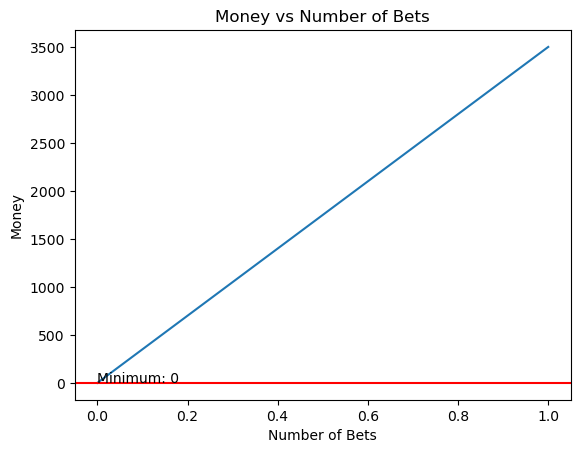

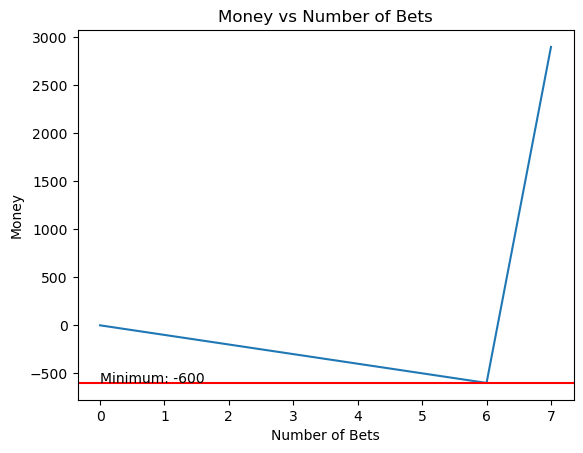

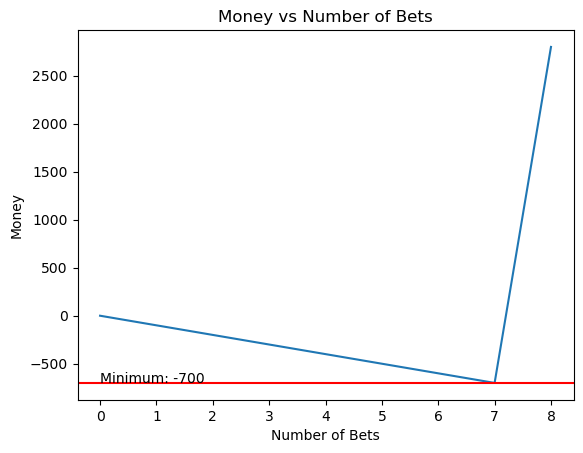

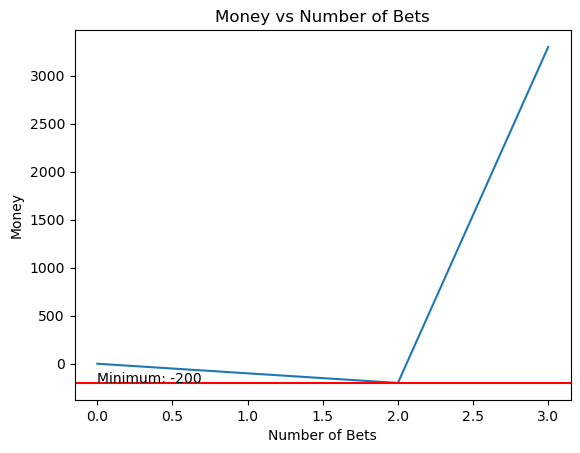

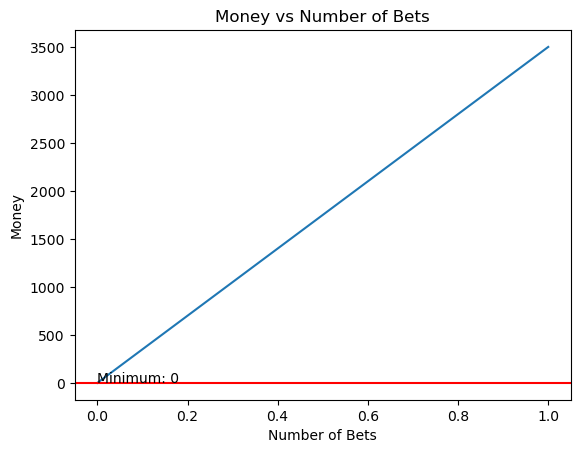

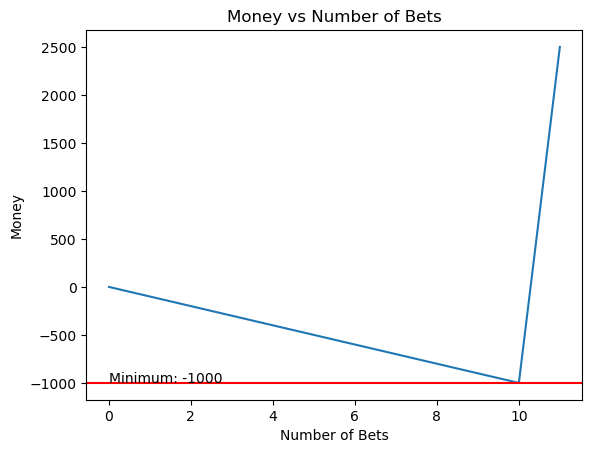

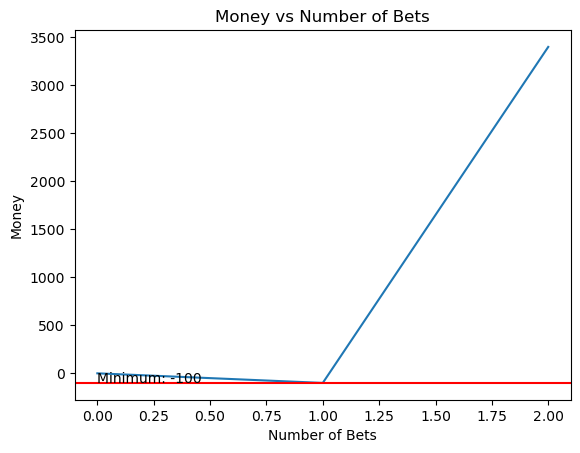

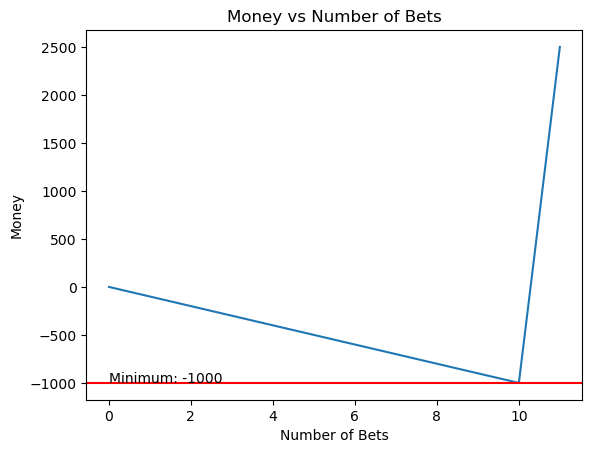

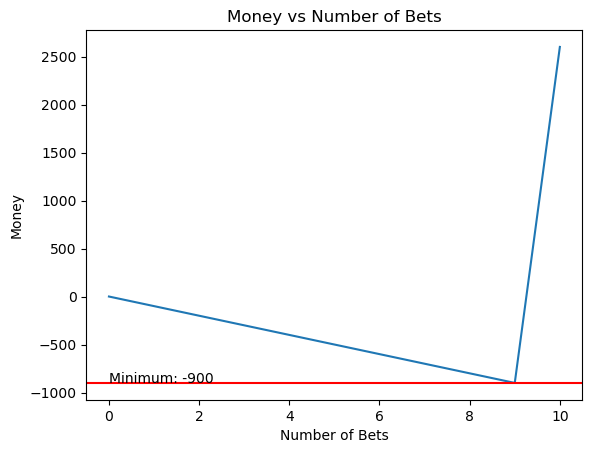

In [29]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 500 units

In [30]:
UNITS = 500

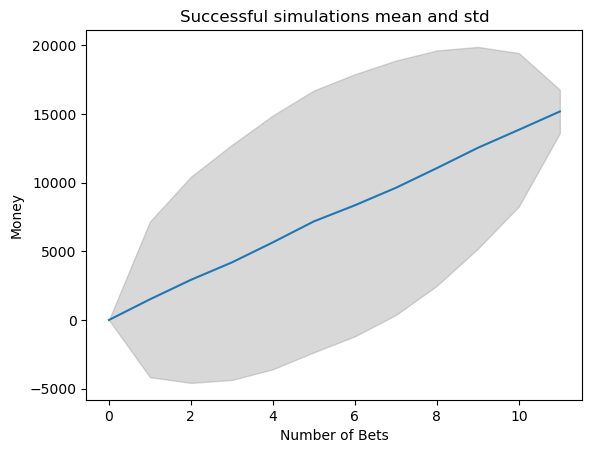

In [31]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

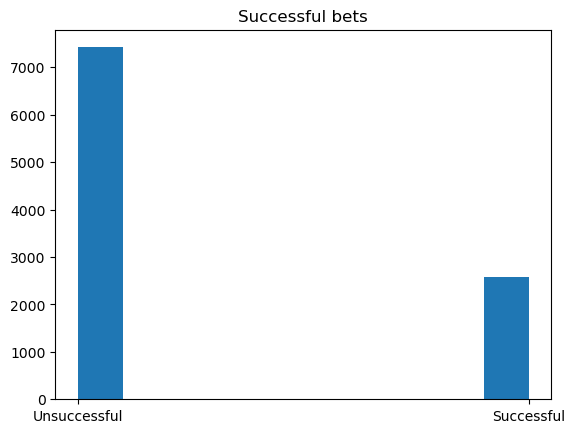

In [32]:
plot_successful_bets(money_histories[UNITS], UNITS)

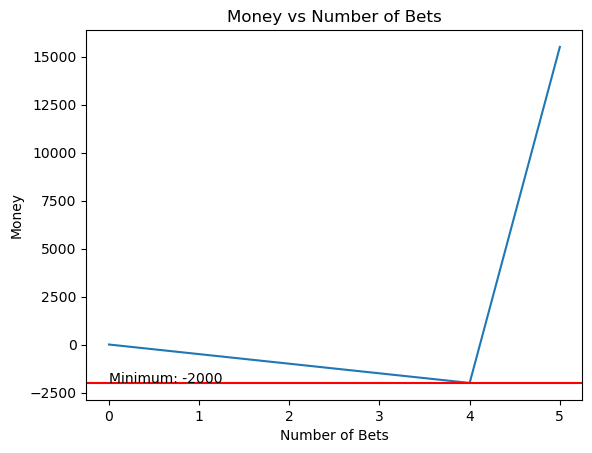

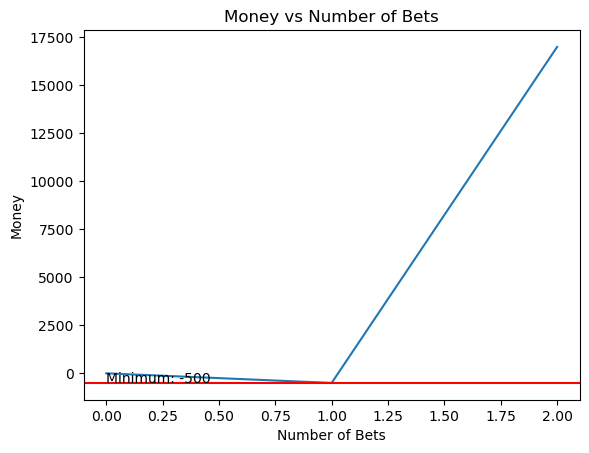

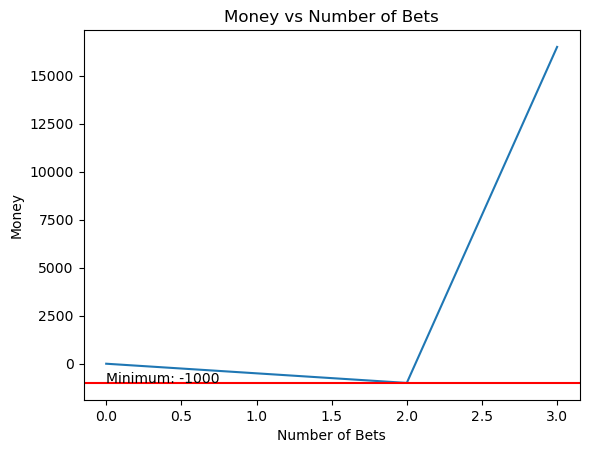

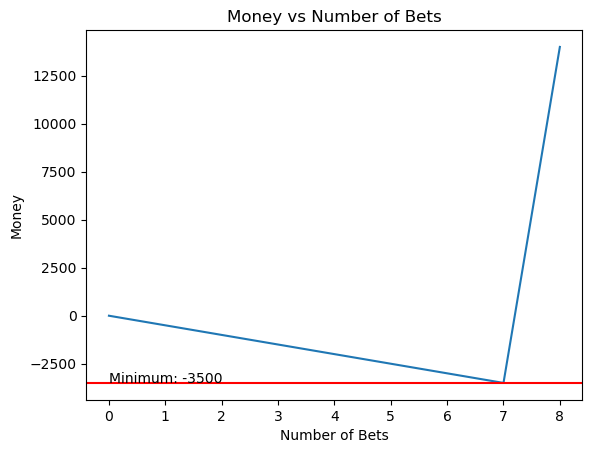

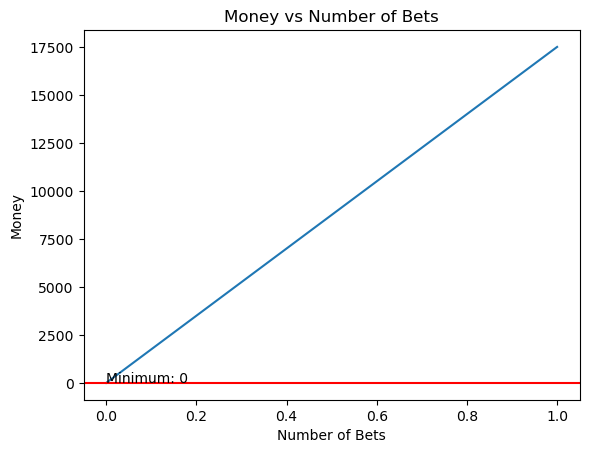

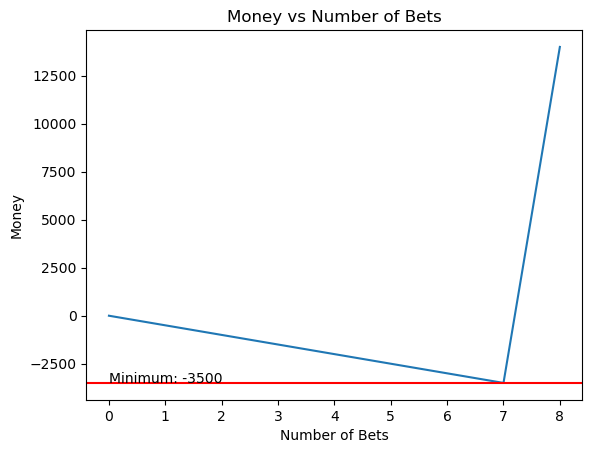

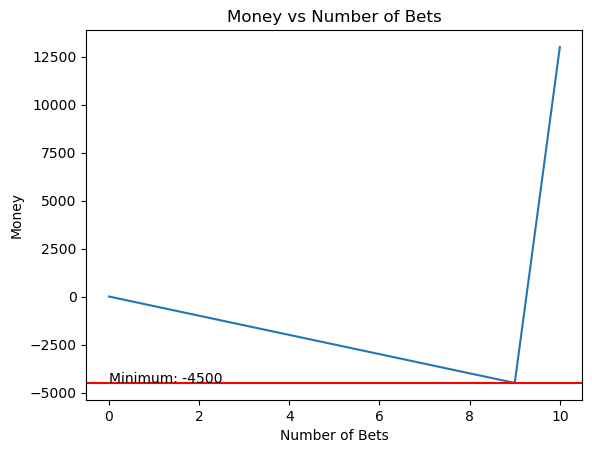

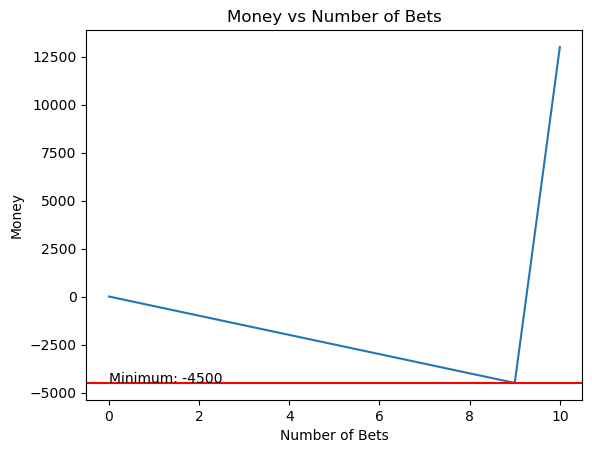

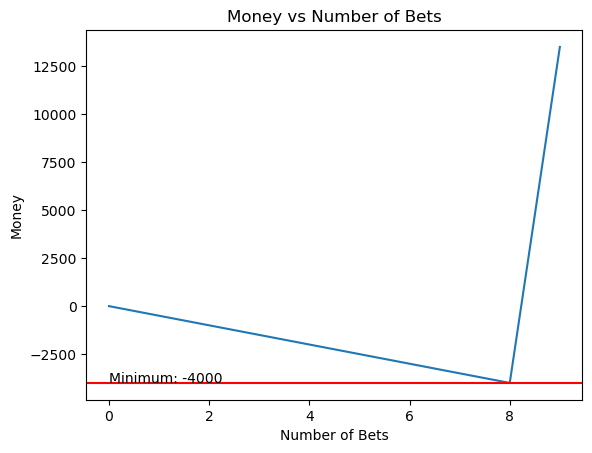

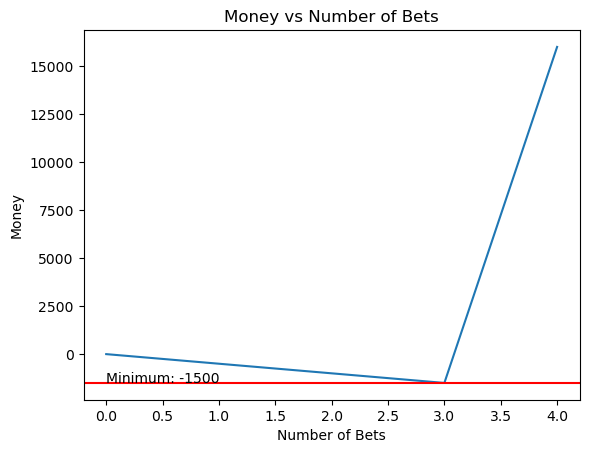

In [33]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 1000 units

In [34]:
UNITS = 1000

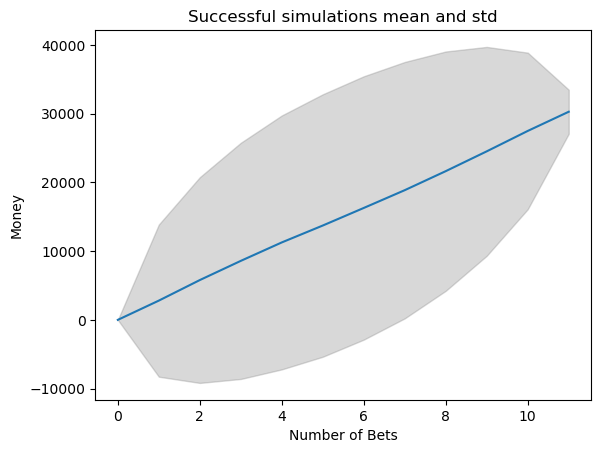

In [35]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

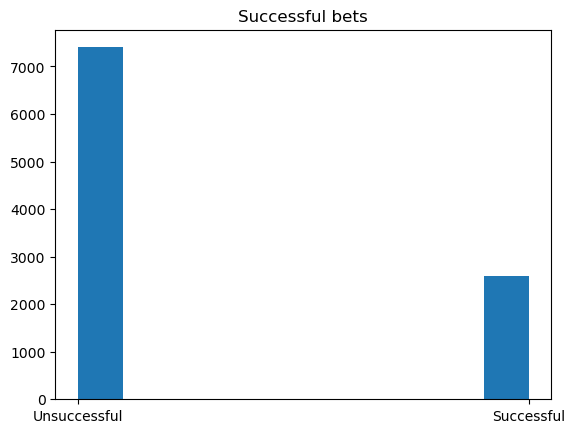

In [36]:
plot_successful_bets(money_histories[UNITS], UNITS)

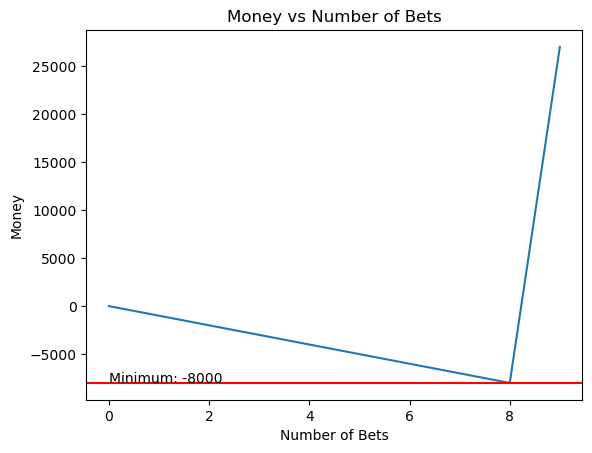

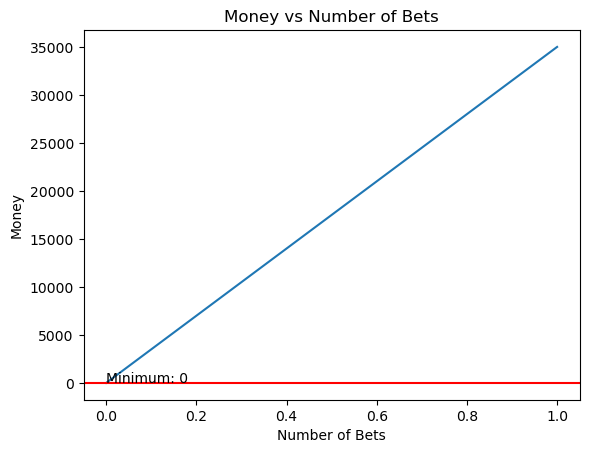

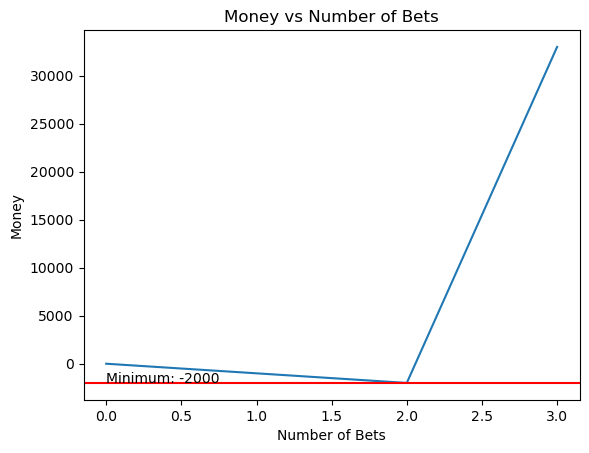

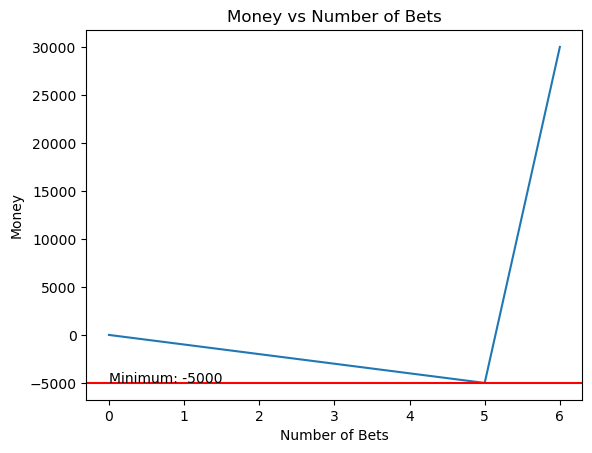

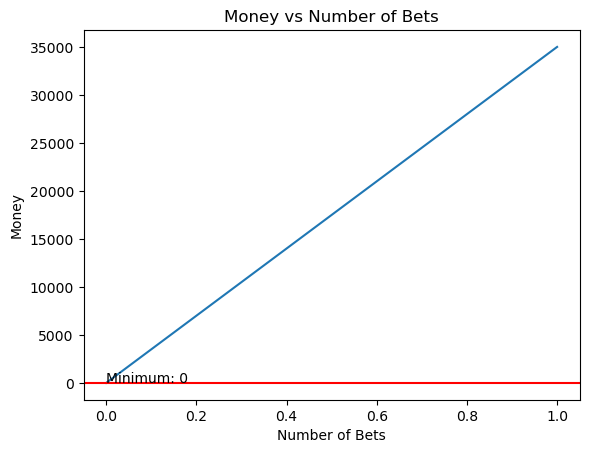

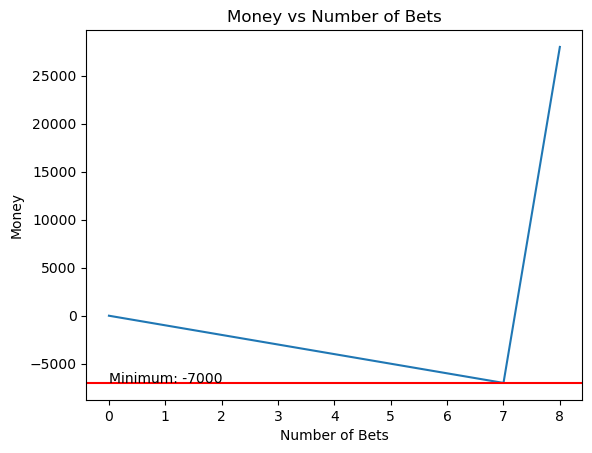

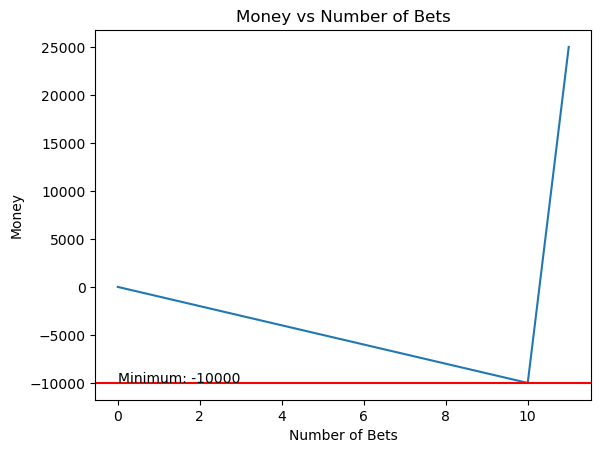

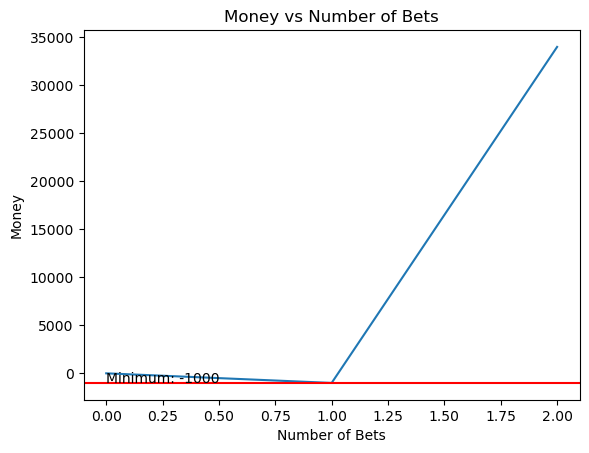

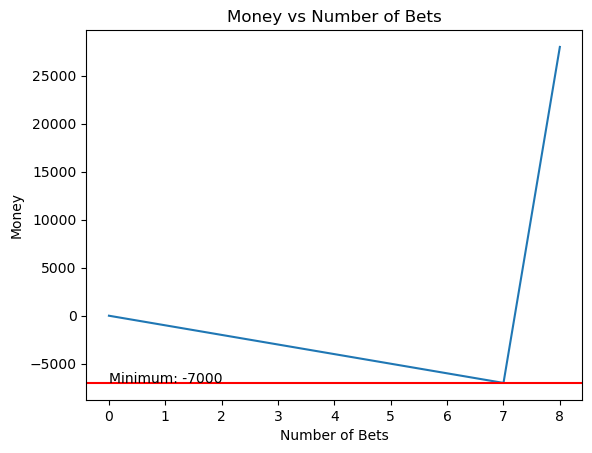

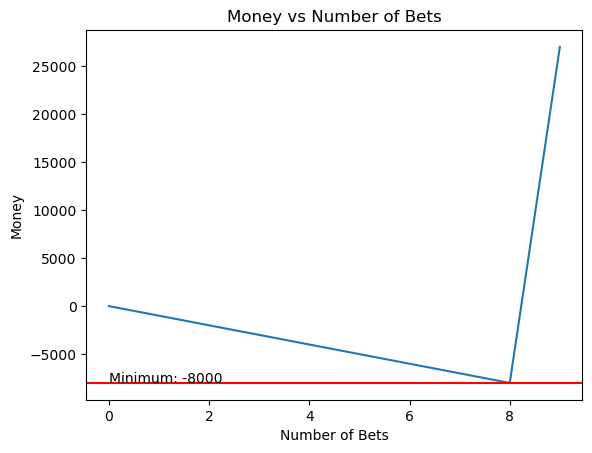

In [37]:
plot_money_histories(successful_histories, UNITS)

## Starting bet = goal, Allowed money lost = -20*goal

In [38]:
money_histories = dict()
for goal in money_goals:
    bet = goal
    tmp_money_histories = simulate_different_goal_money(
                        betting_type = andrucci_betting, 
                        goal_money_list = [goal], 
                        number_histories = 10000,
                        start_bet= bet,
                        money_limit= -20*bet)
    money_histories = money_histories | tmp_money_histories

In [39]:
successful_histories = get_successful_histories(money_histories, money_goals)

In [40]:
for goal in money_goals:
    print(f"For goal {goal} mean money won:")
    print(get_mean_money_won(money_histories, goal))

For goal 10 mean money won:
259.58760537707906
For goal 100 mean money won:
2579.169472502806
For goal 500 mean money won:
13070.446348061316
For goal 1000 mean money won:
25937.32782369146


### Analysis when the goal is to win 10 units

In [41]:
UNITS = 10

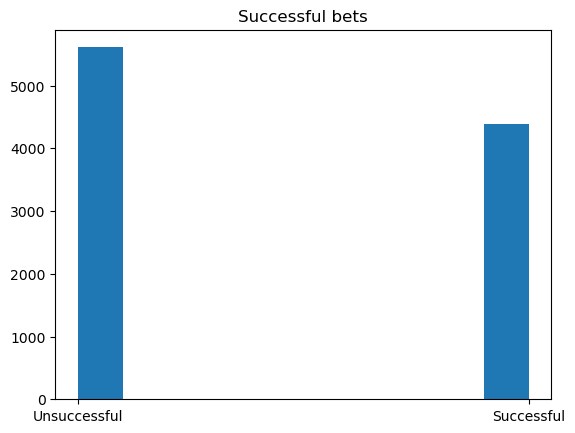

In [42]:
plot_successful_bets(money_histories[UNITS], UNITS)

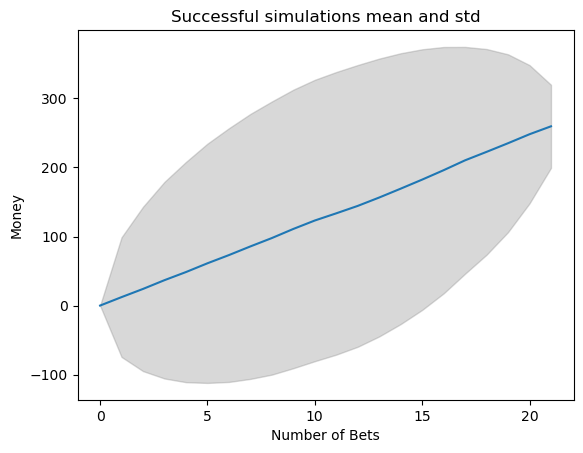

In [43]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

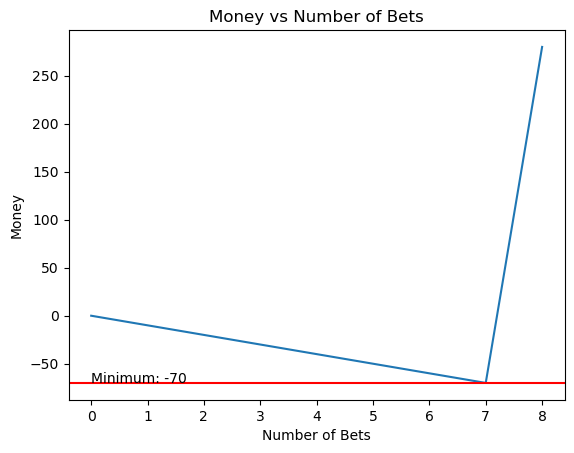

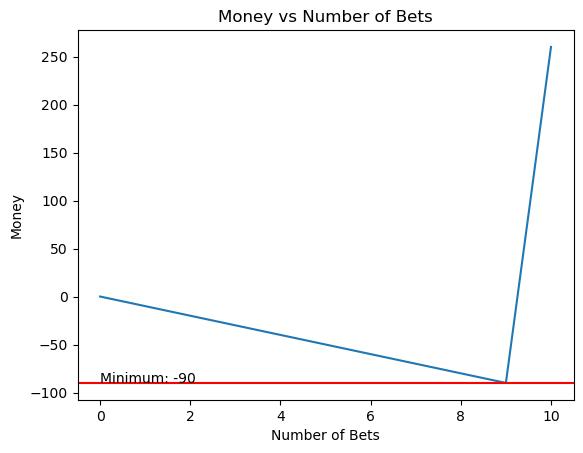

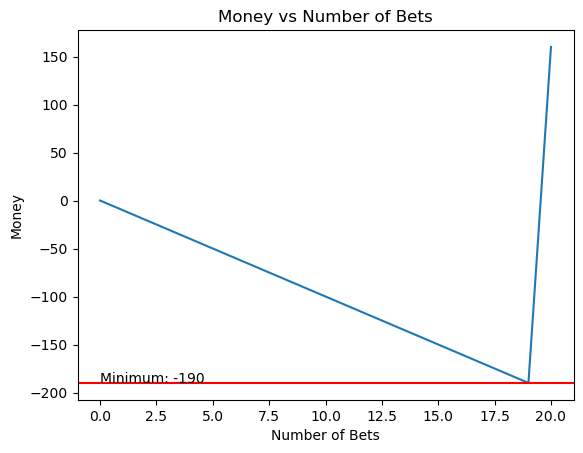

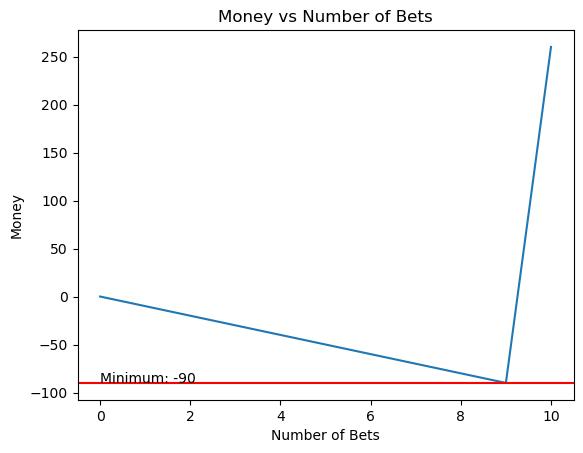

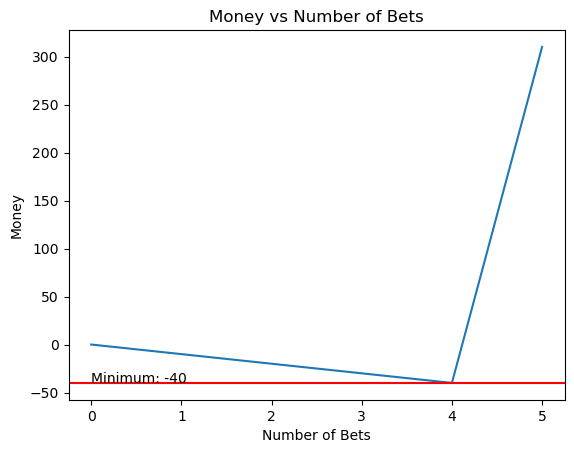

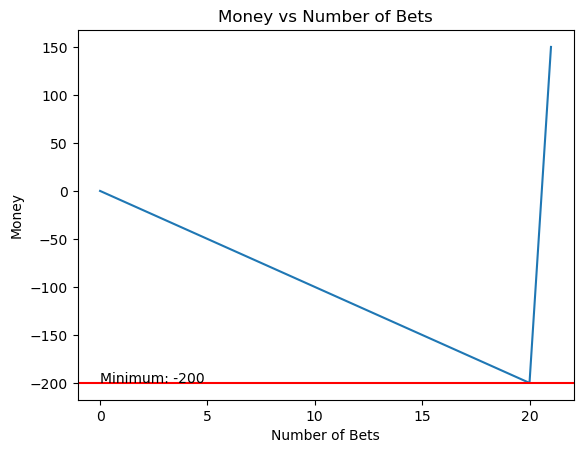

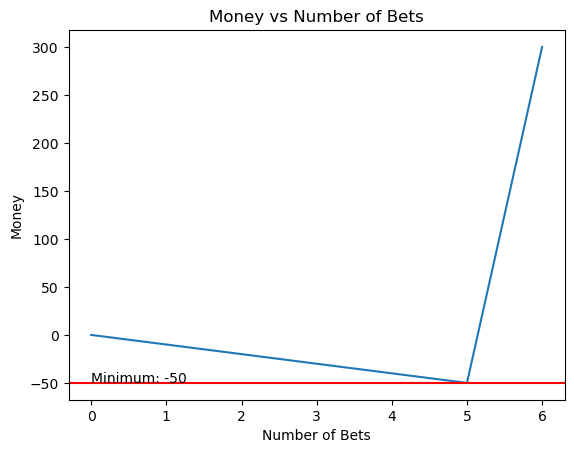

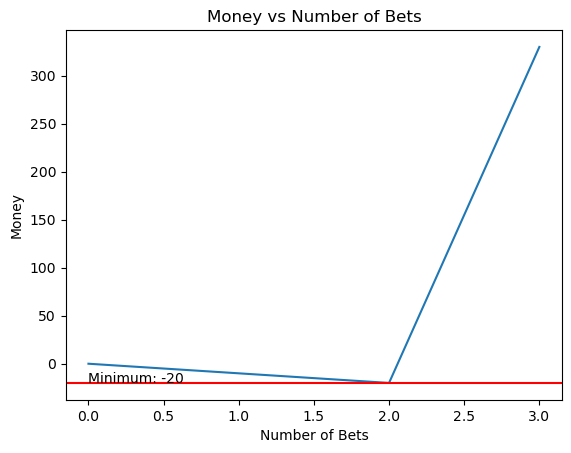

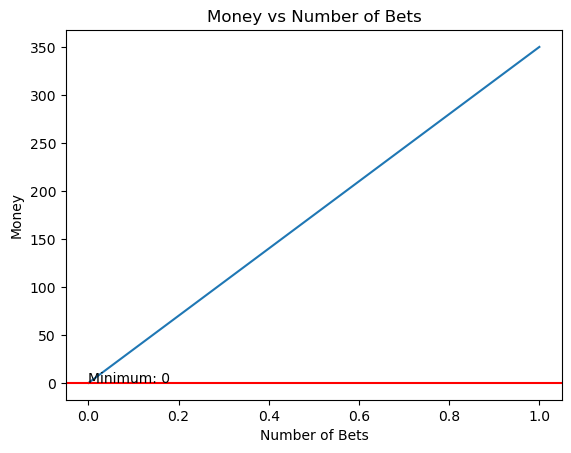

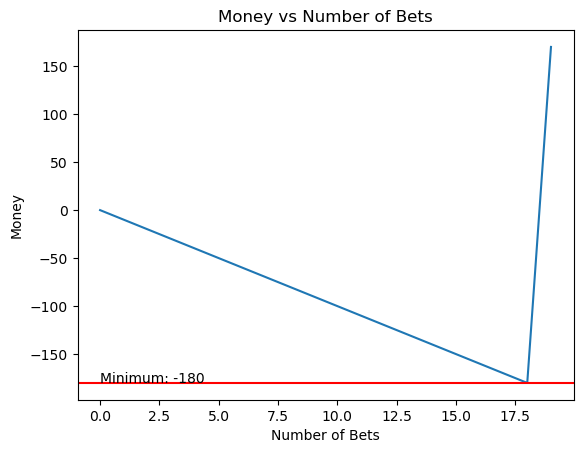

In [44]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 100 units

In [45]:
UNITS = 100

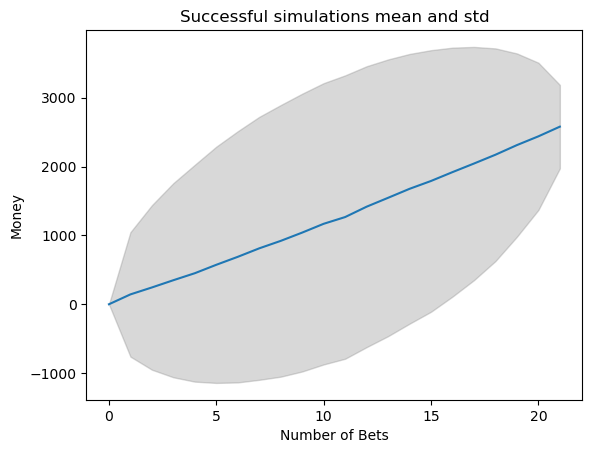

In [46]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

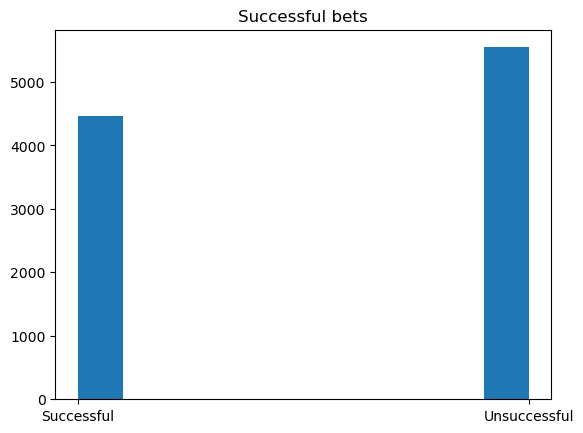

In [47]:
plot_successful_bets(money_histories[UNITS], UNITS)

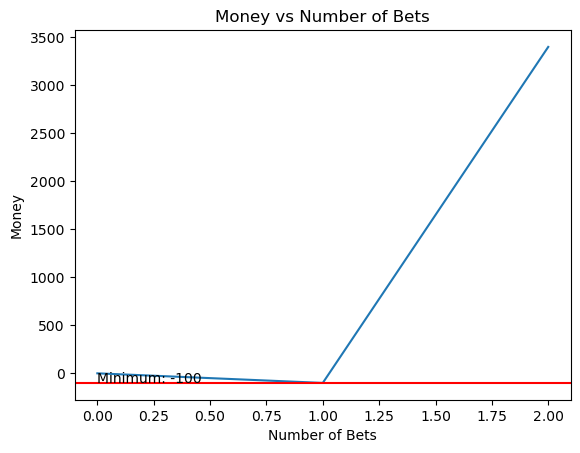

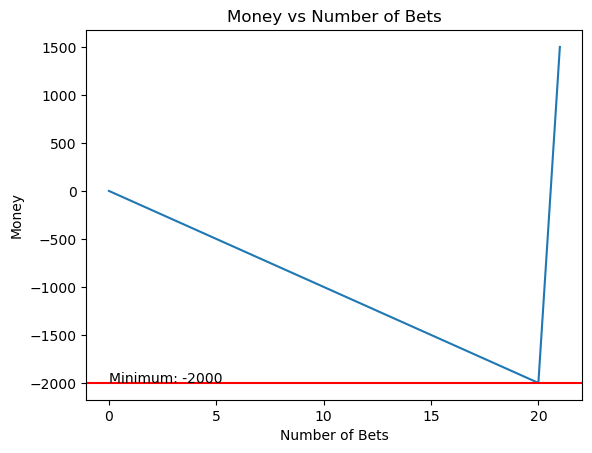

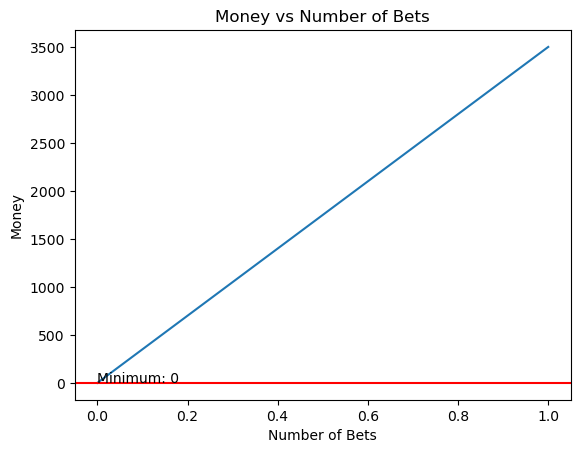

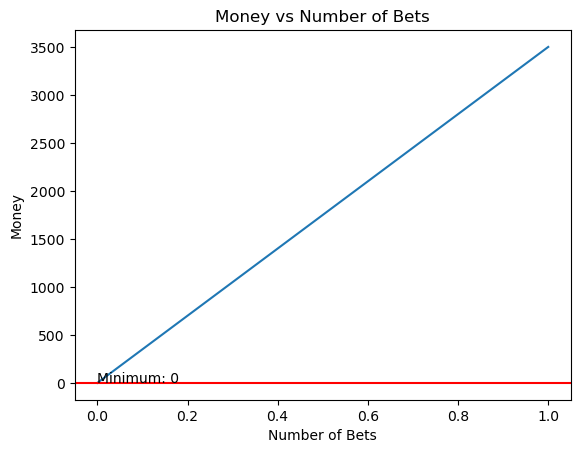

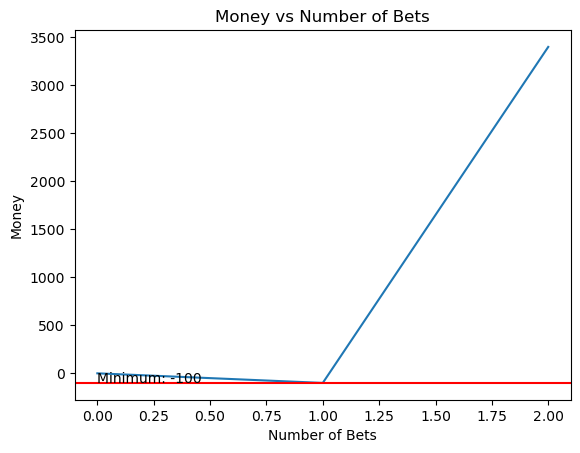

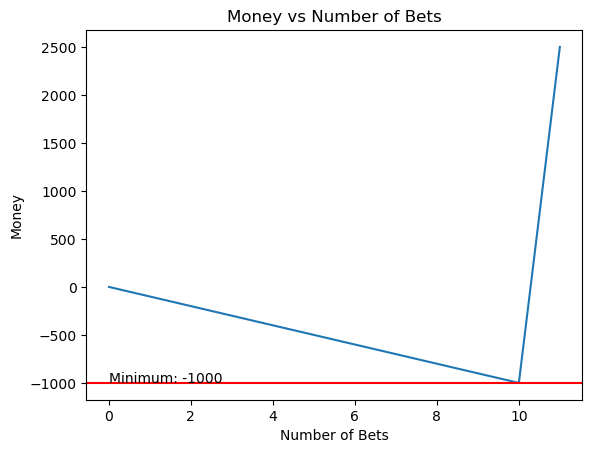

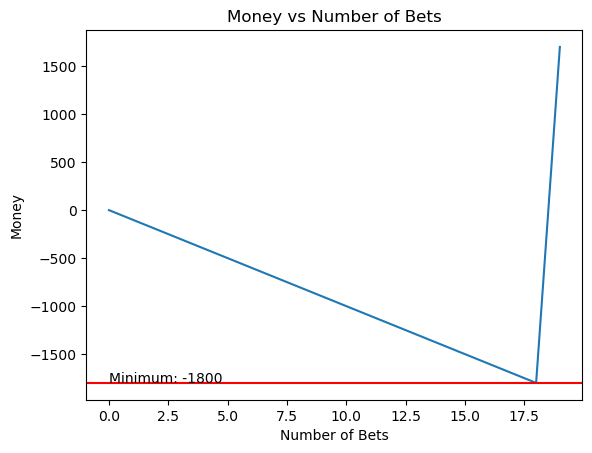

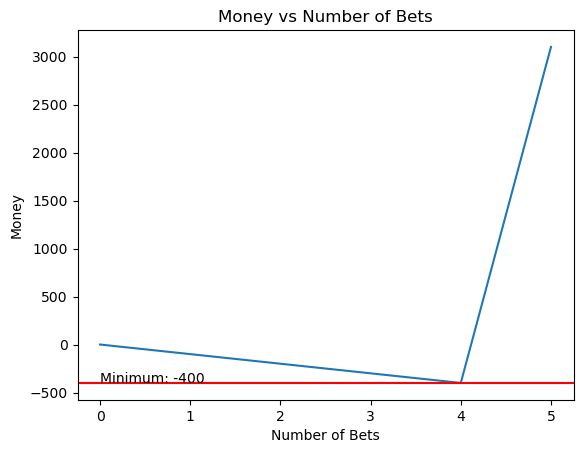

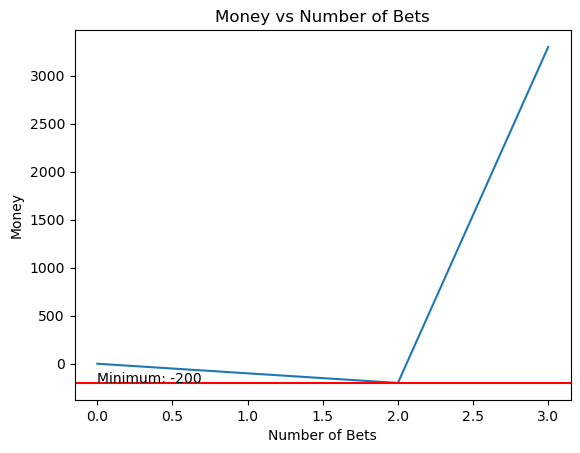

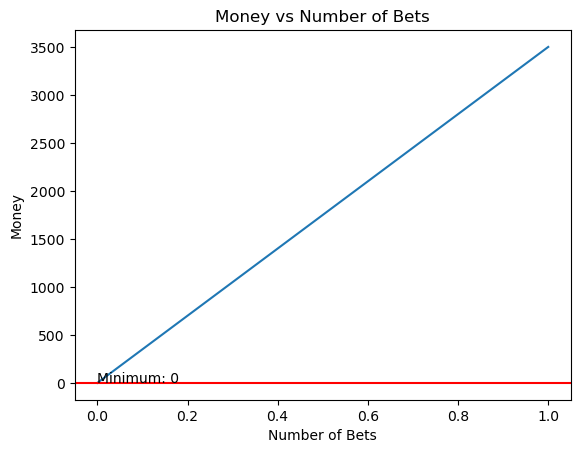

In [48]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 500 units

In [49]:
UNITS = 500

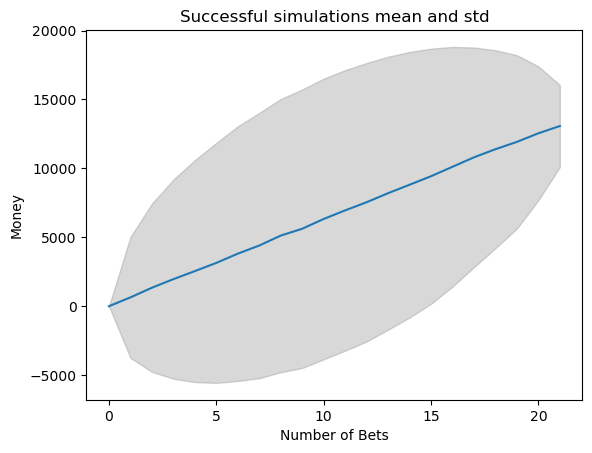

In [50]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

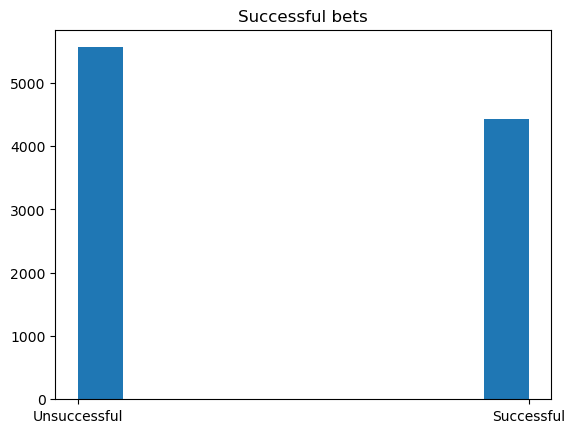

In [51]:
plot_successful_bets(money_histories[UNITS], UNITS)

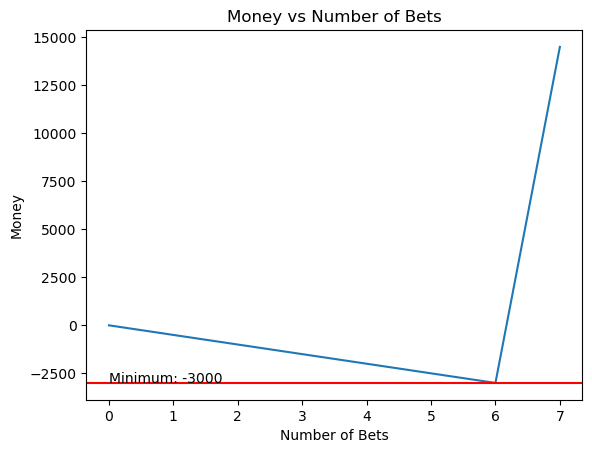

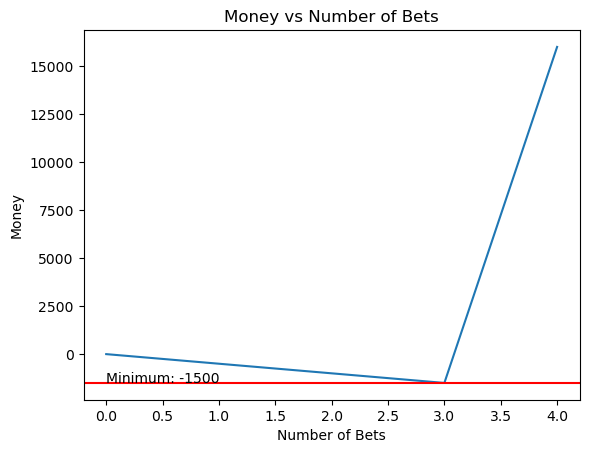

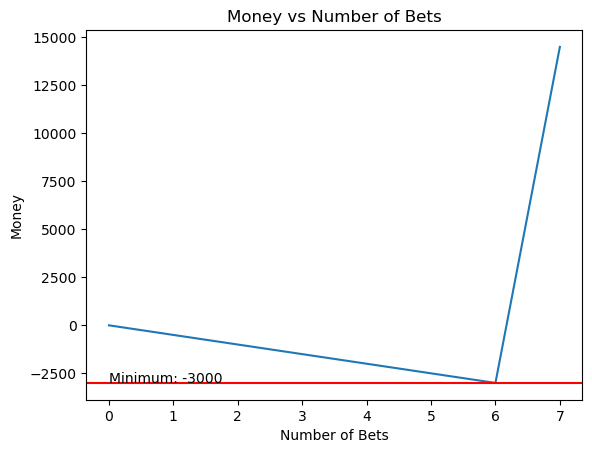

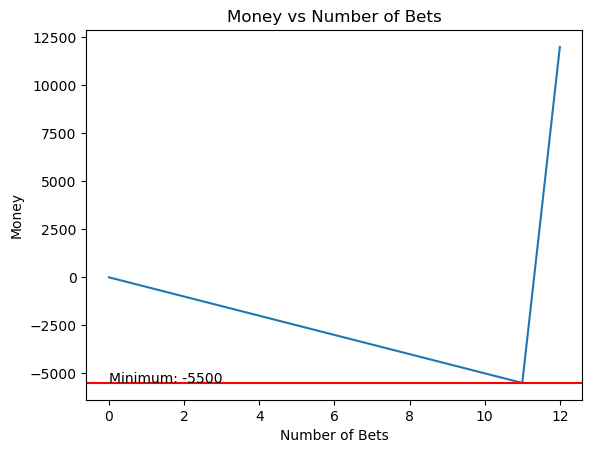

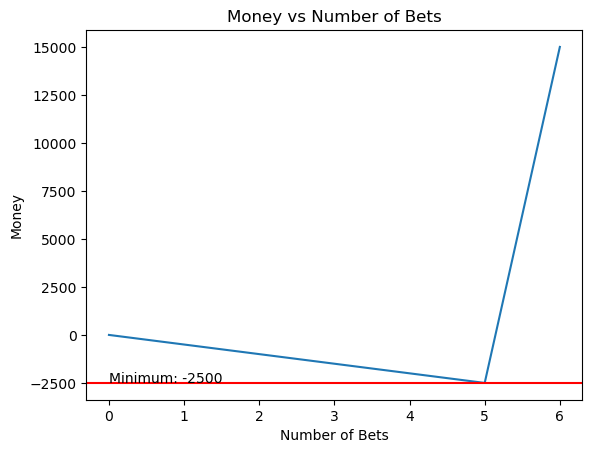

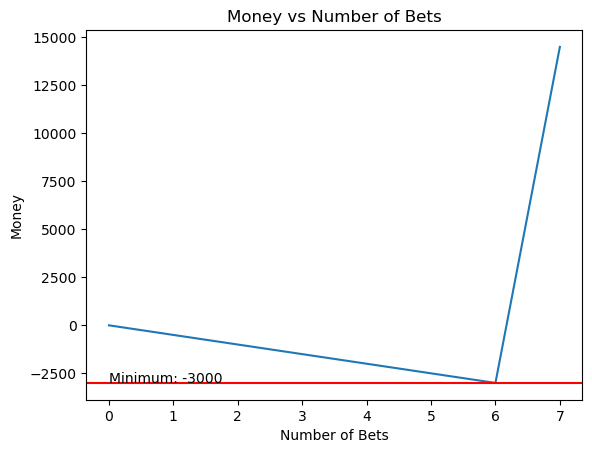

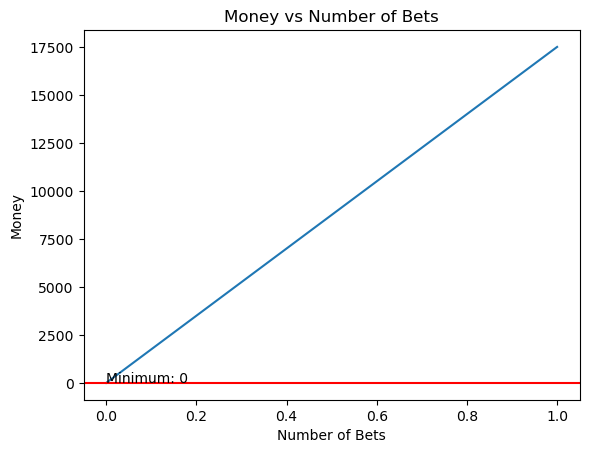

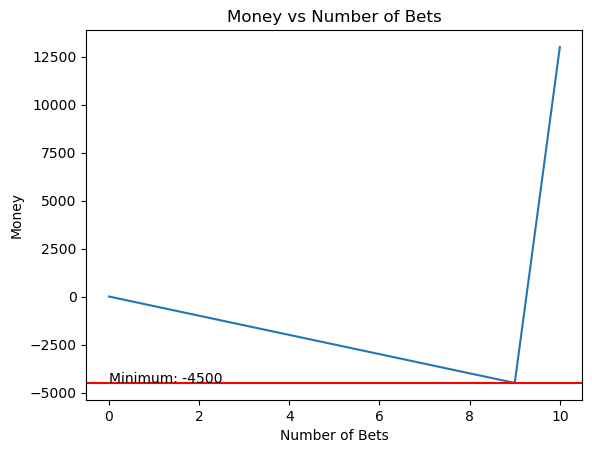

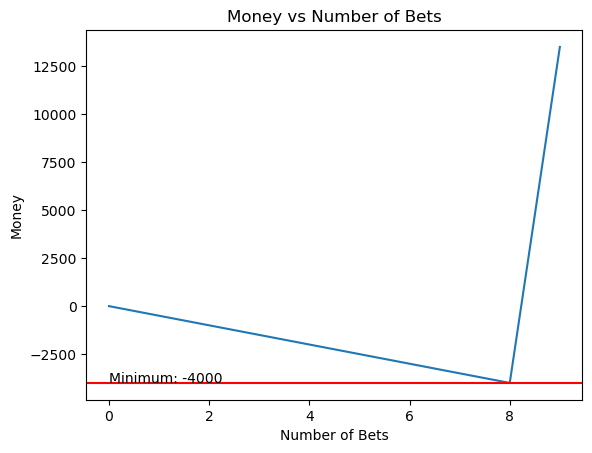

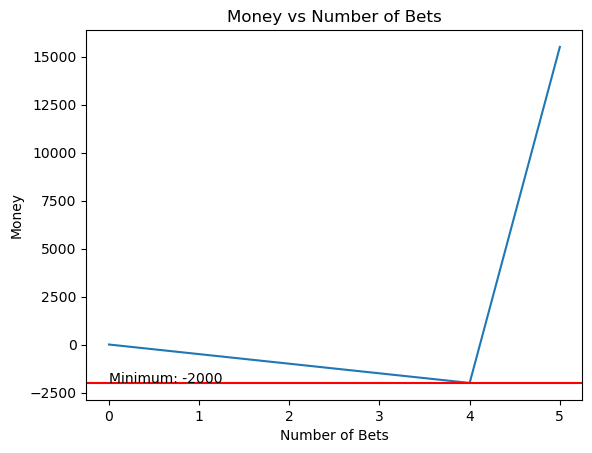

In [52]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 1000 units

In [53]:
UNITS = 1000

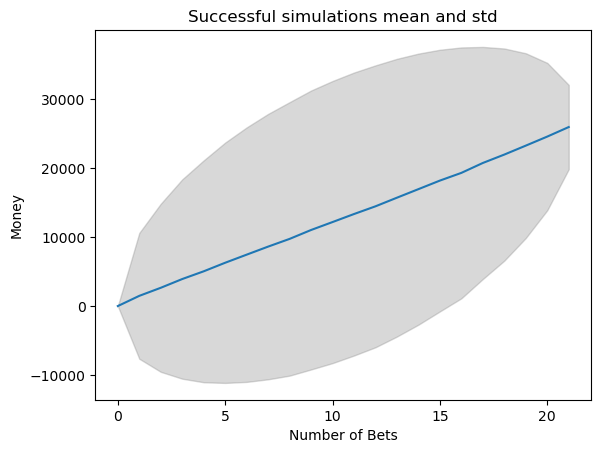

In [54]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

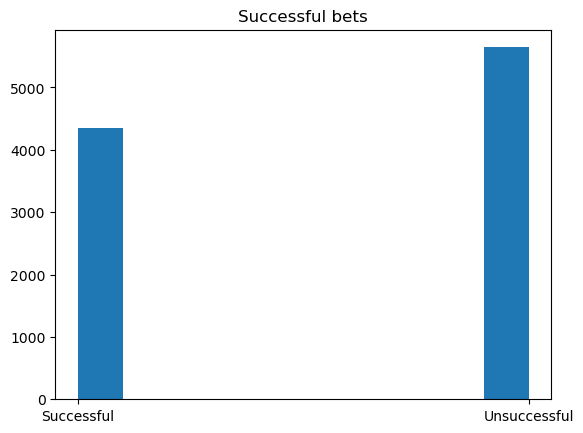

In [55]:
plot_successful_bets(money_histories[UNITS], UNITS)

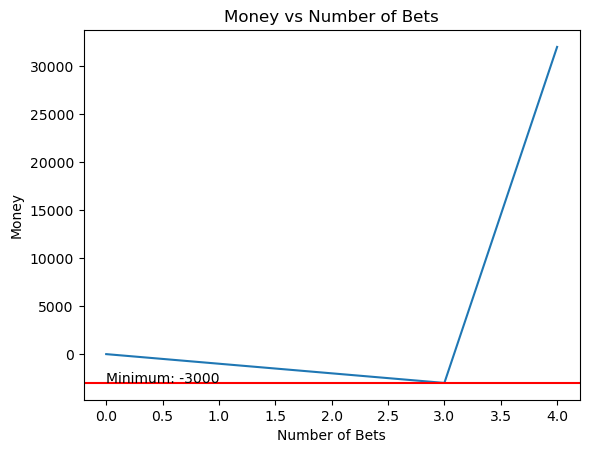

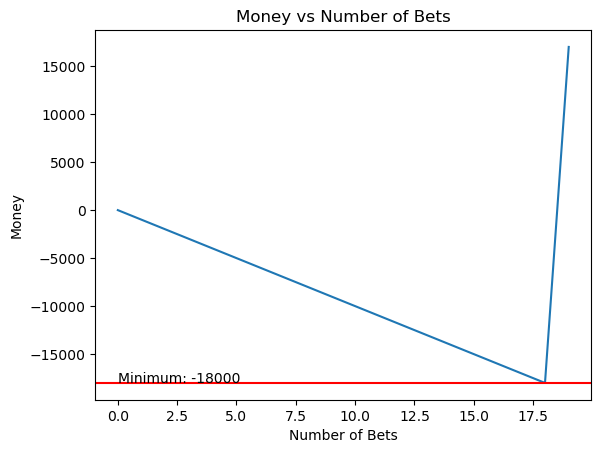

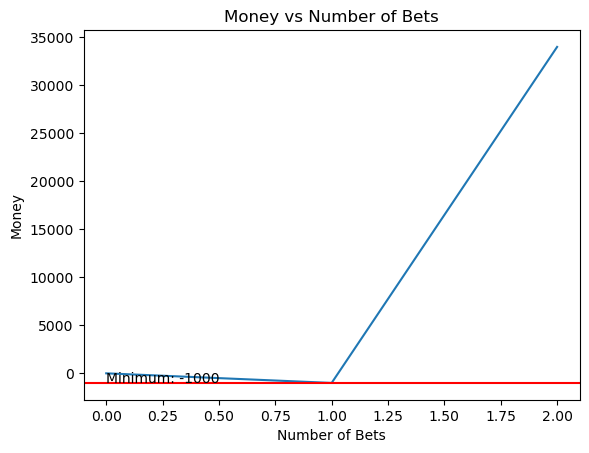

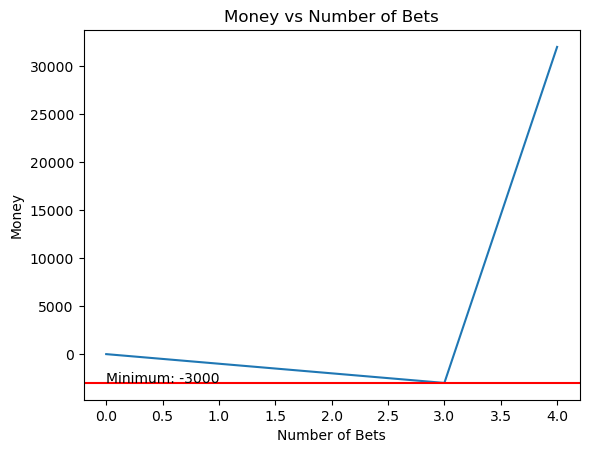

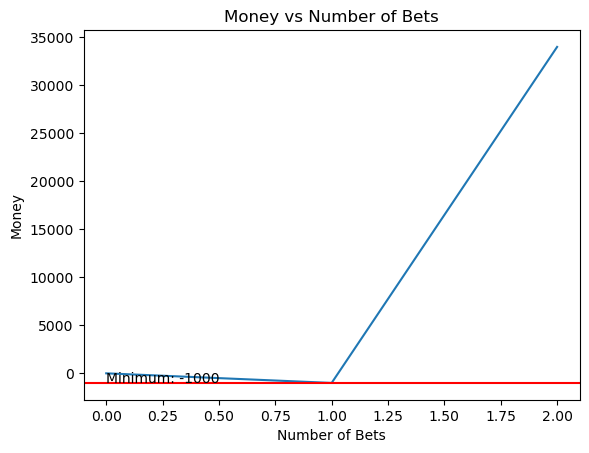

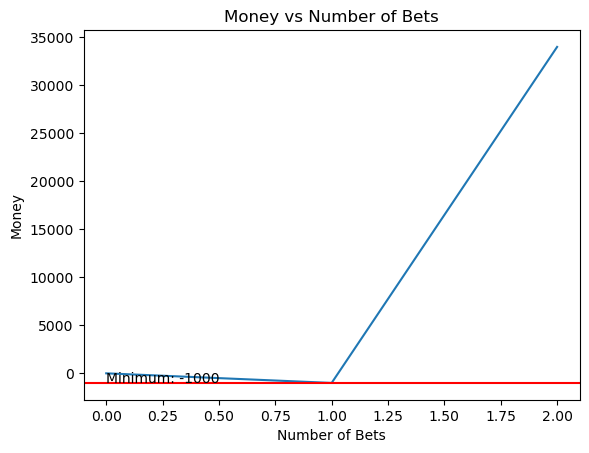

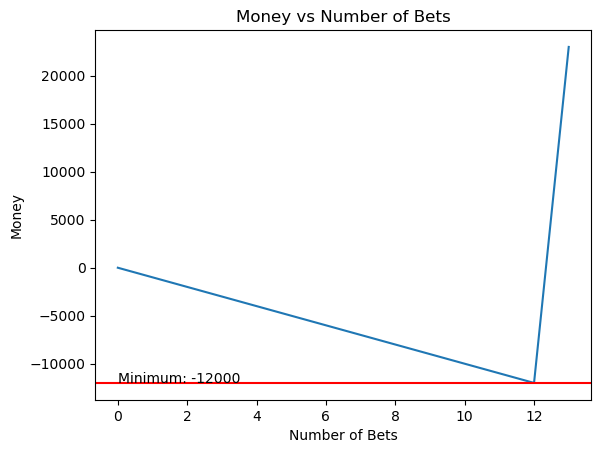

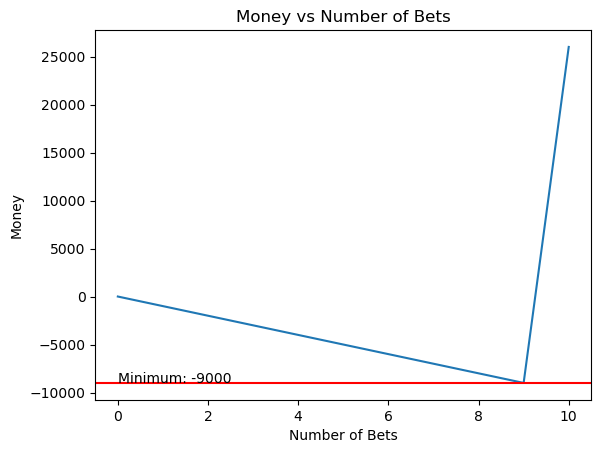

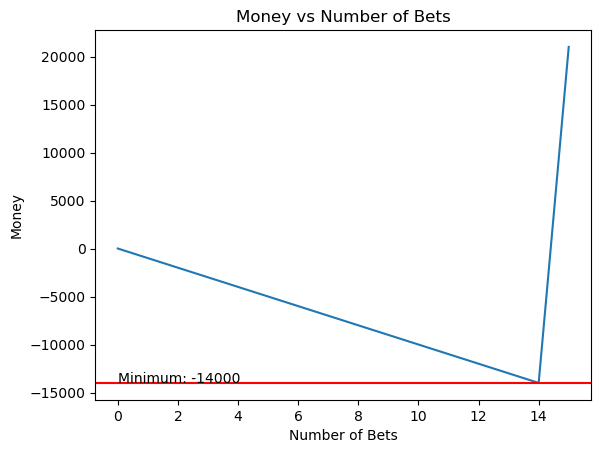

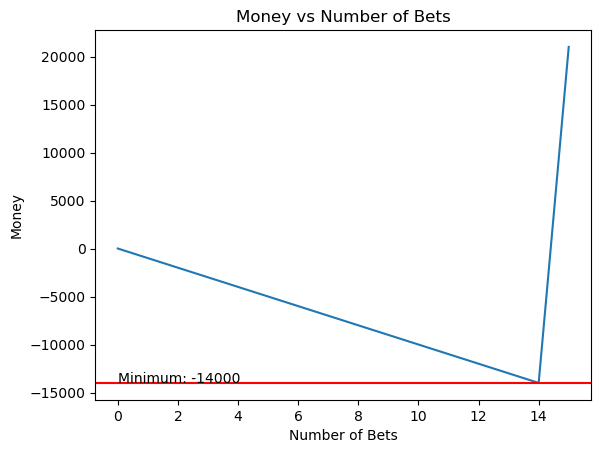

In [56]:
plot_money_histories(successful_histories, UNITS)

## Starting bet = goal, Allowed money lost = -30*goal

In [57]:
money_histories = dict()
for goal in money_goals:
    bet = goal
    tmp_money_histories = simulate_different_goal_money(
                        betting_type = andrucci_betting, 
                        goal_money_list = [goal], 
                        number_histories = 10000,
                        start_bet= bet,
                        money_limit= -30*bet)
    money_histories = money_histories | tmp_money_histories

In [58]:
successful_histories = get_successful_histories(money_histories, money_goals)

In [59]:
for goal in money_goals:
    print(f"For goal {goal} mean money won:")
    print(get_mean_money_won(money_histories, goal))

For goal 10 mean money won:
220.68864342423197
For goal 100 mean money won:
2238.064516129032
For goal 500 mean money won:
11128.325647392692
For goal 1000 mean money won:
22237.086324636664


### Analysis when the goal is to win 10 units

In [60]:
UNITS = 10

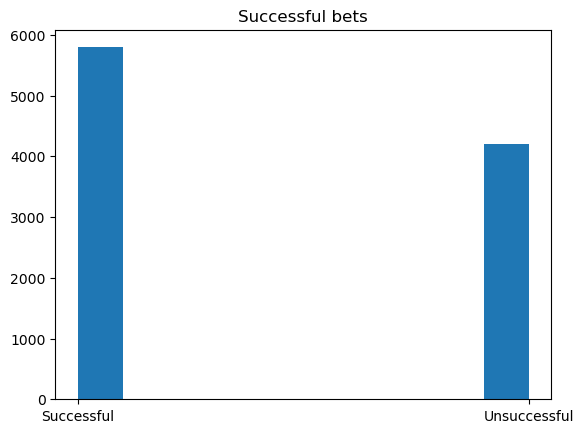

In [61]:
plot_successful_bets(money_histories[UNITS], UNITS)

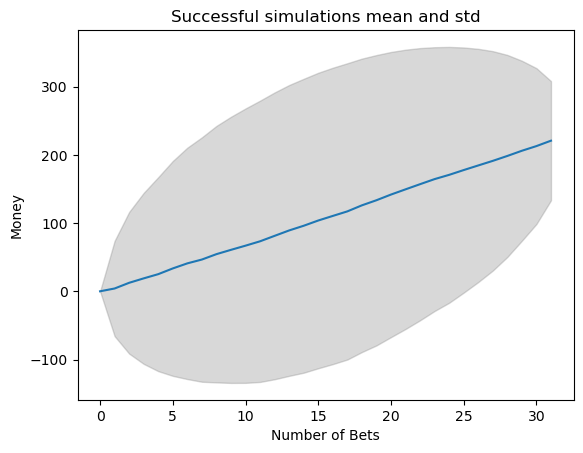

In [62]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

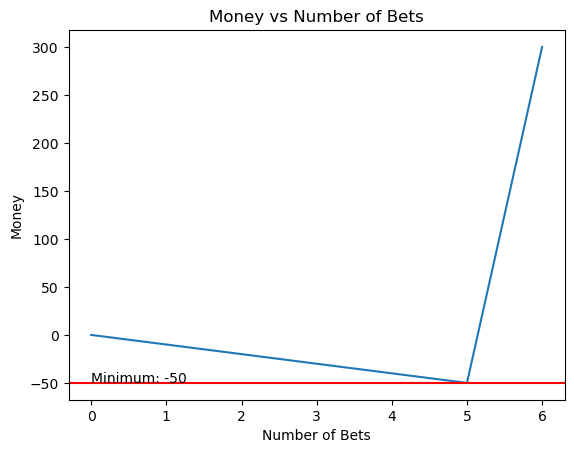

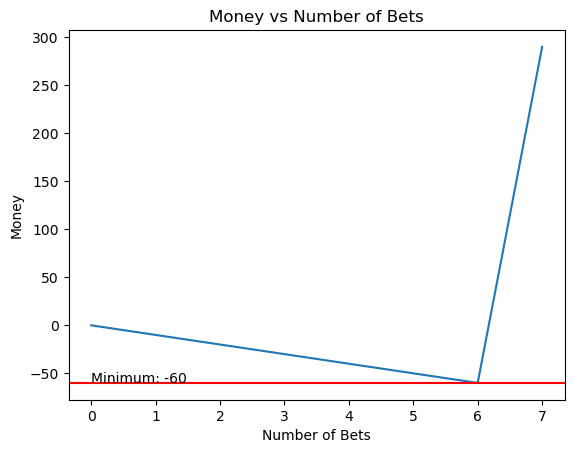

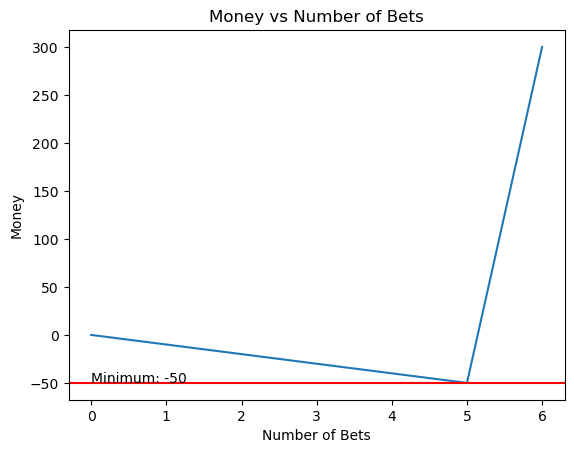

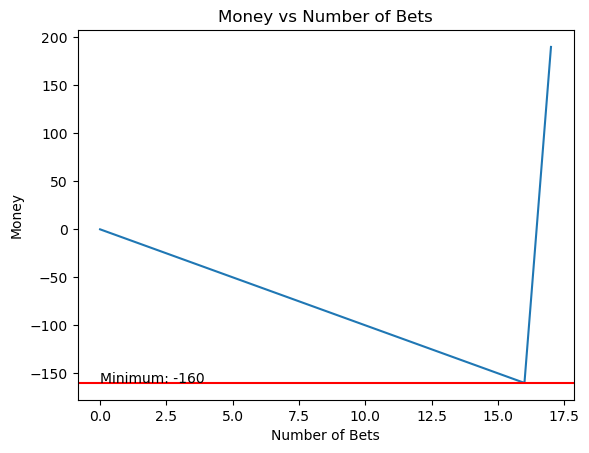

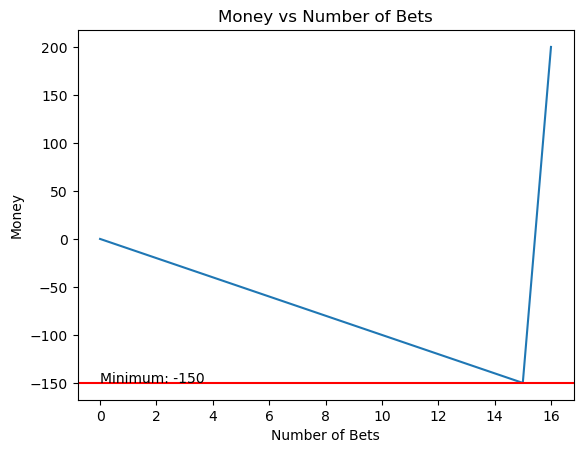

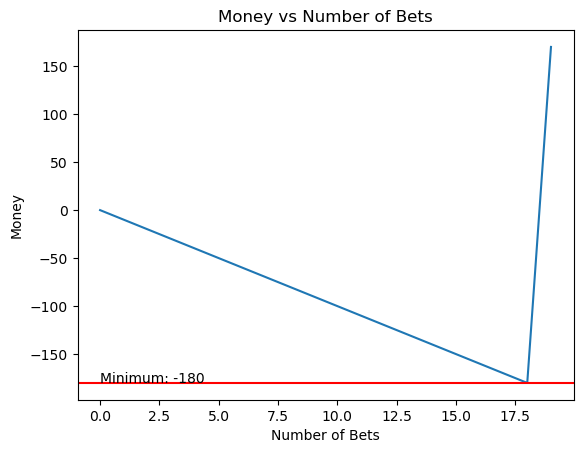

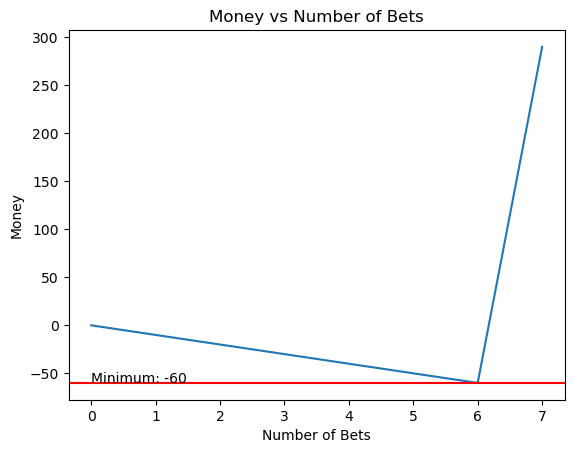

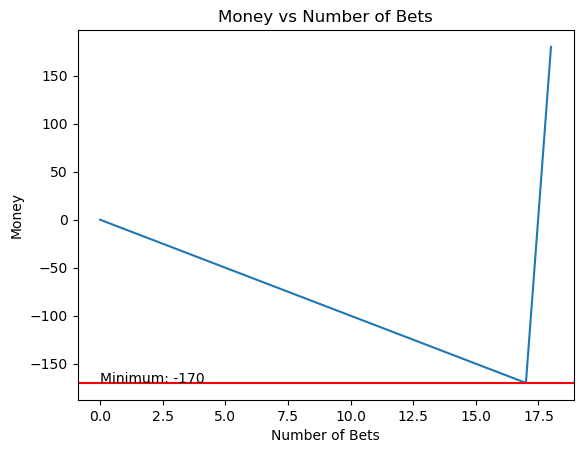

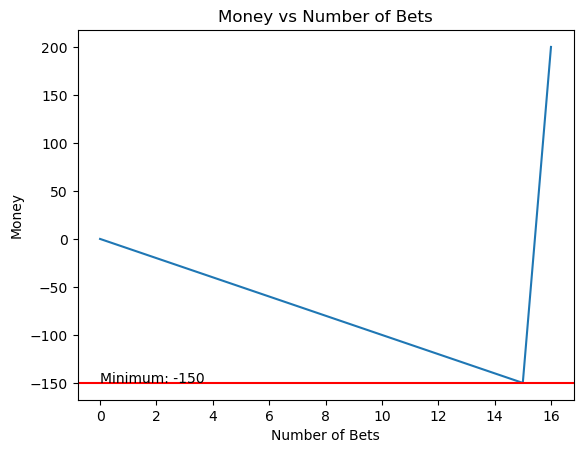

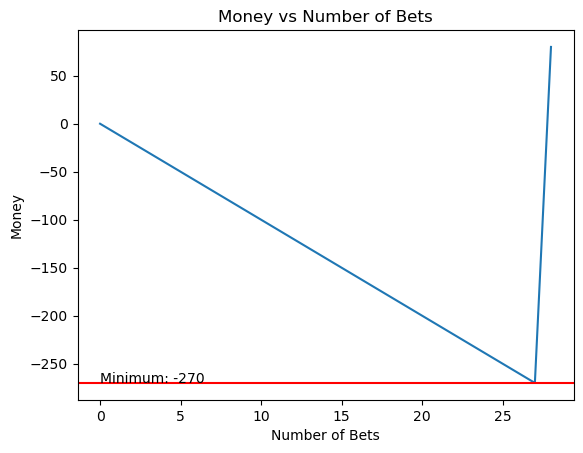

In [63]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 100 units

In [64]:
UNITS = 100

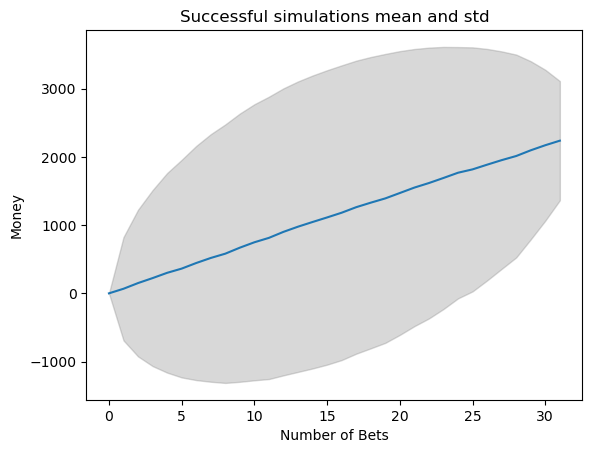

In [65]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

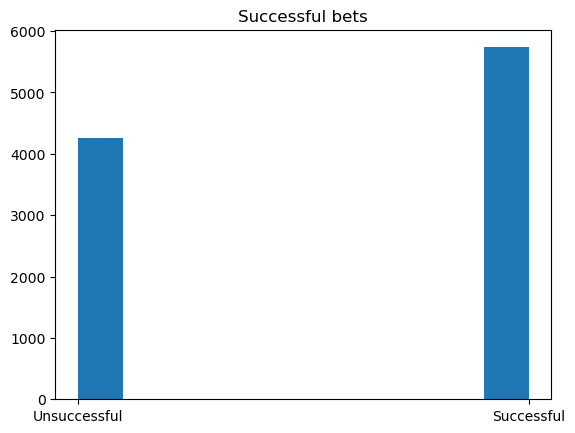

In [66]:
plot_successful_bets(money_histories[UNITS], UNITS)

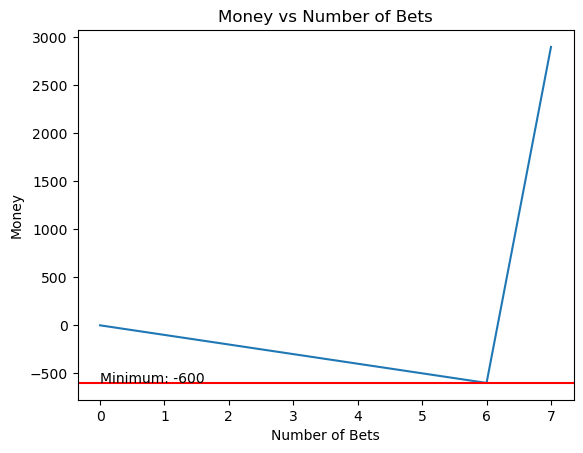

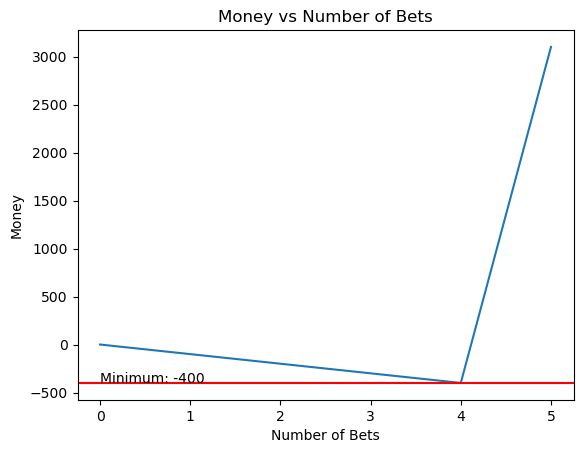

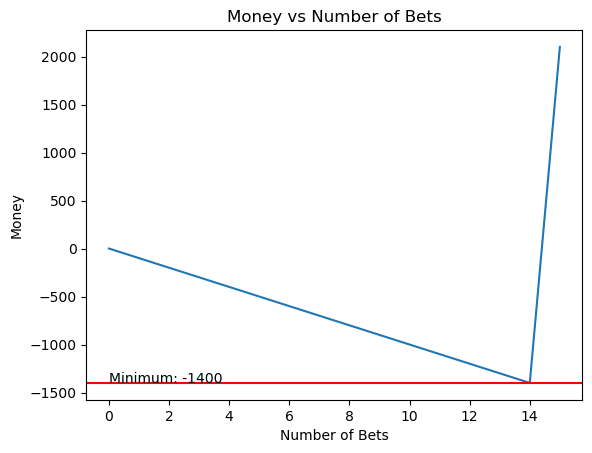

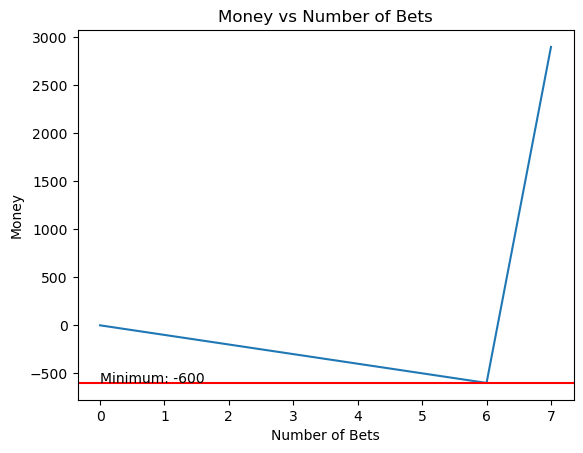

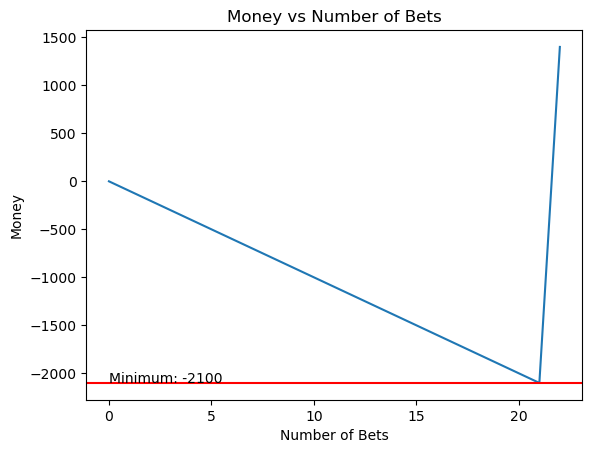

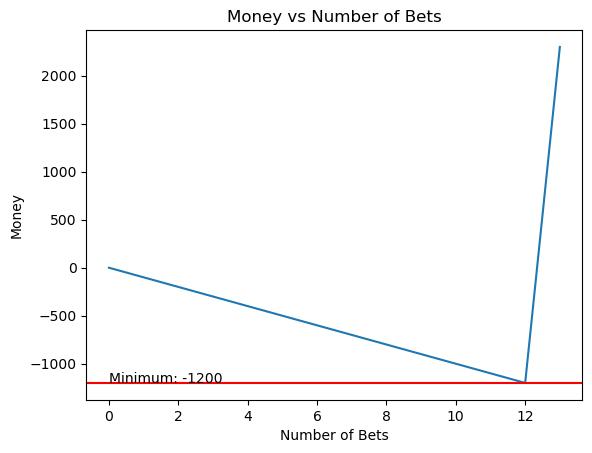

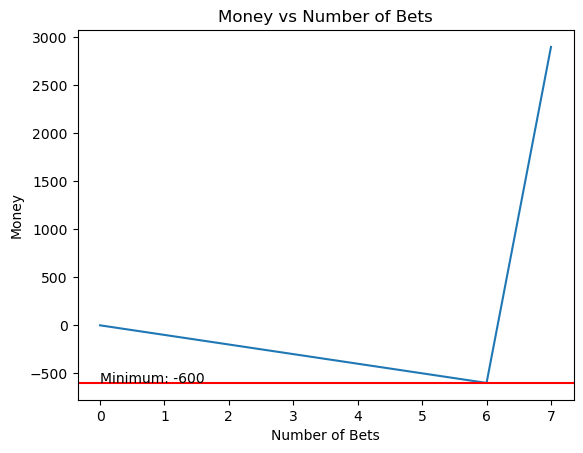

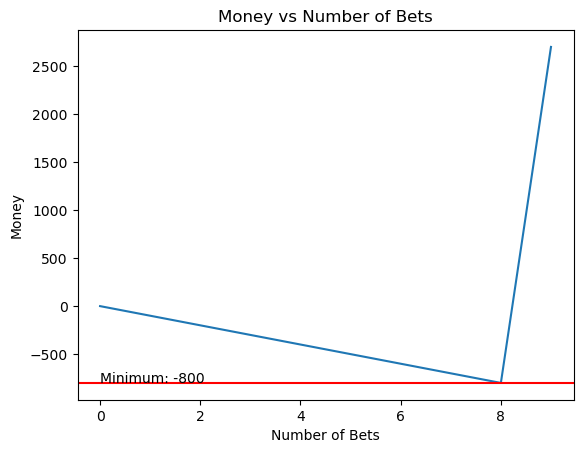

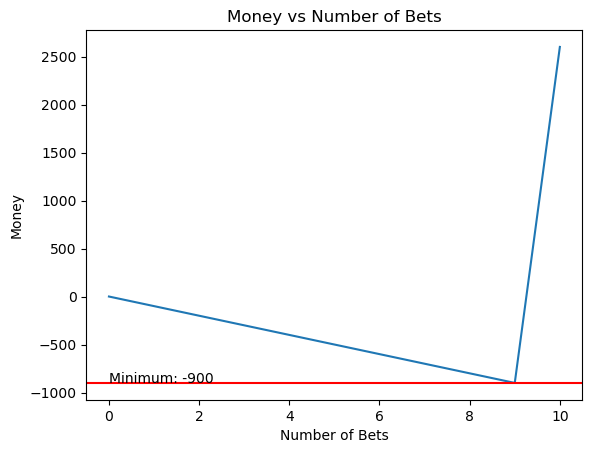

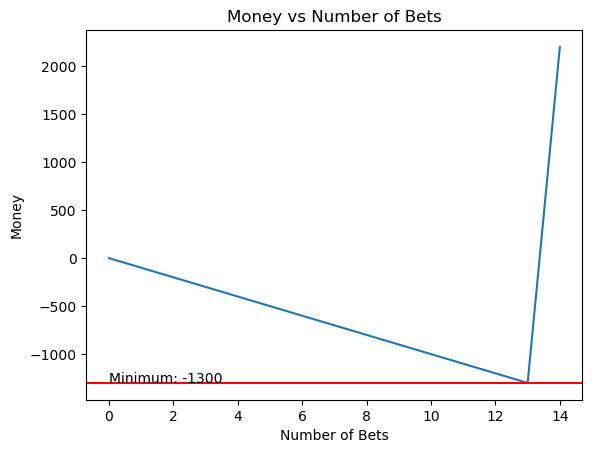

In [67]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 500 units

In [68]:
UNITS = 500

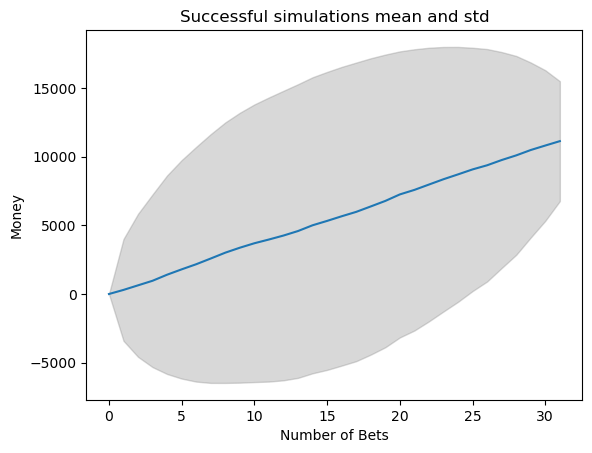

In [69]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

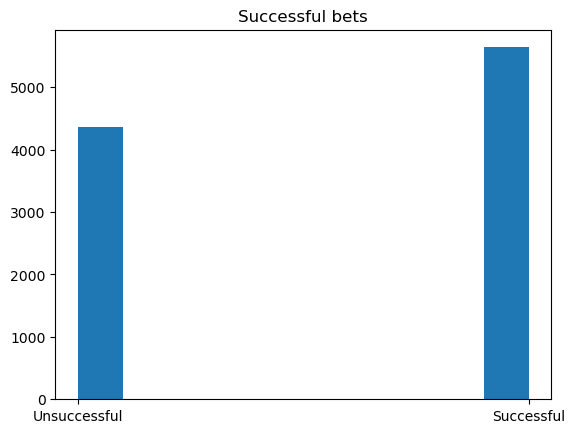

In [70]:
plot_successful_bets(money_histories[UNITS], UNITS)

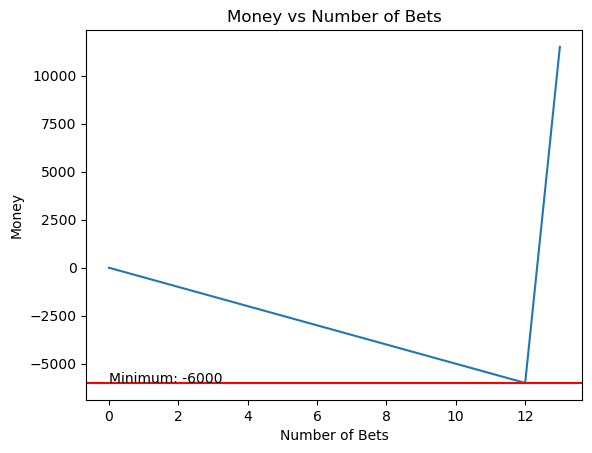

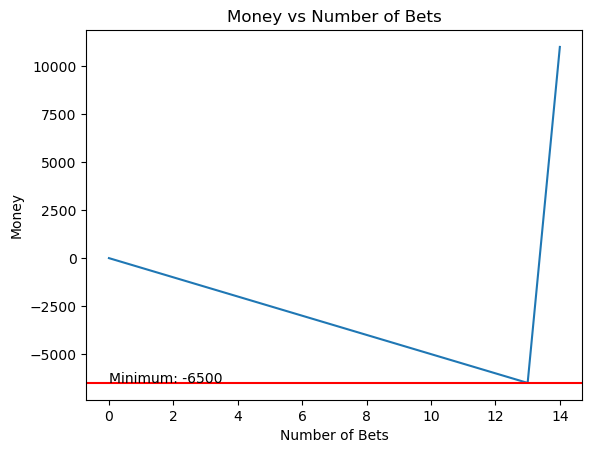

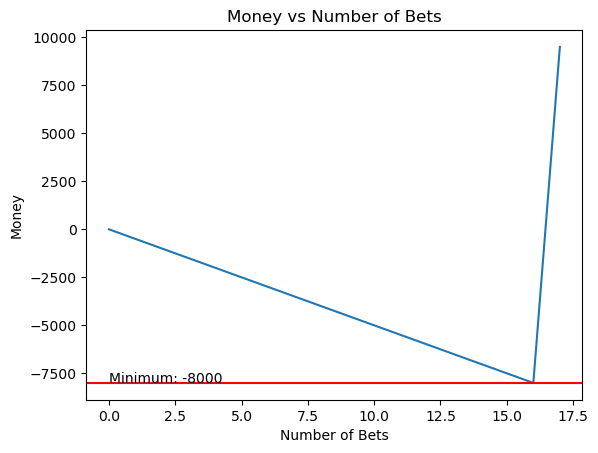

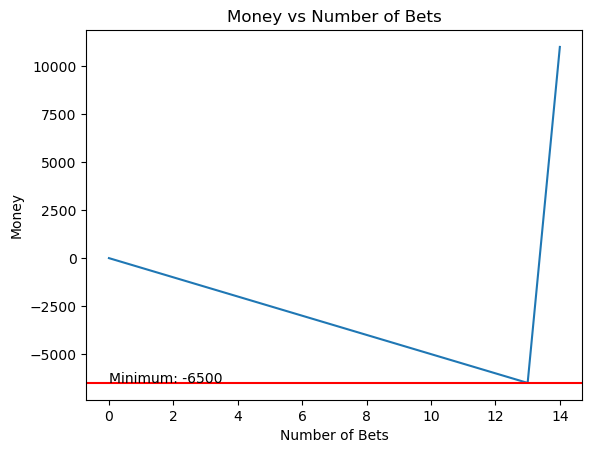

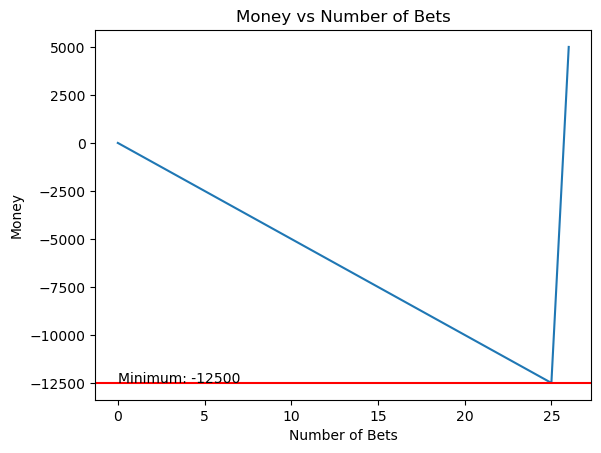

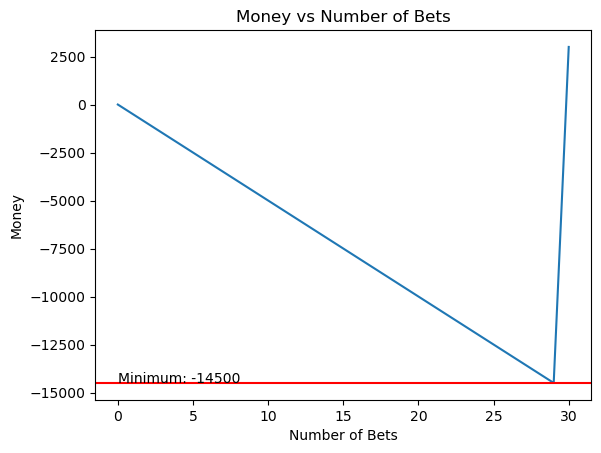

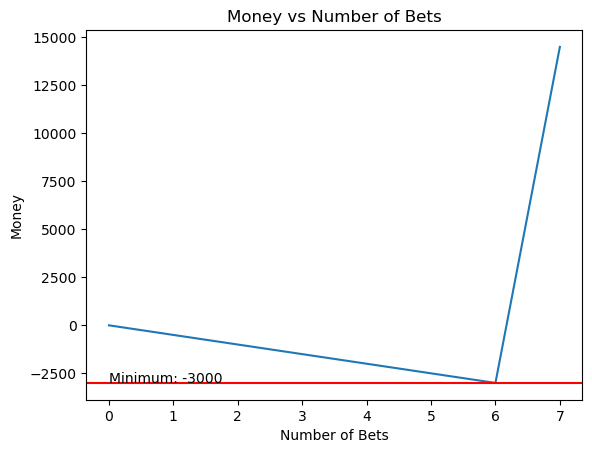

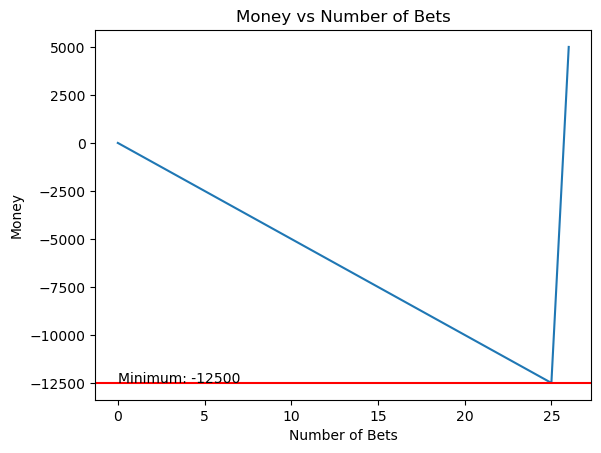

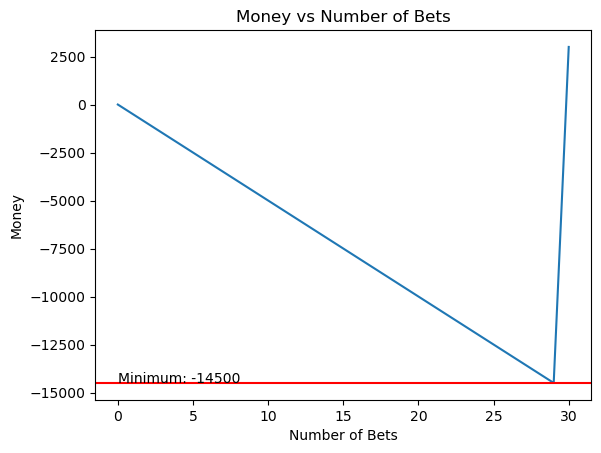

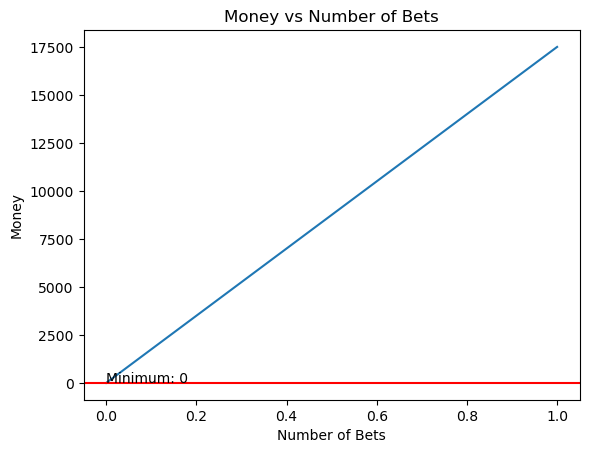

In [71]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 1000 units

In [72]:
UNITS = 1000

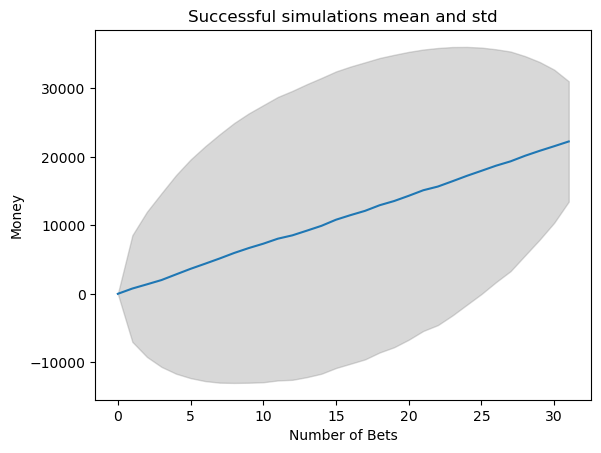

In [73]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

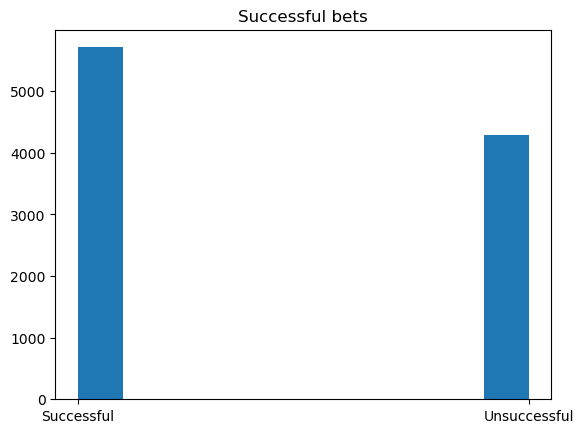

In [74]:
plot_successful_bets(money_histories[UNITS], UNITS)

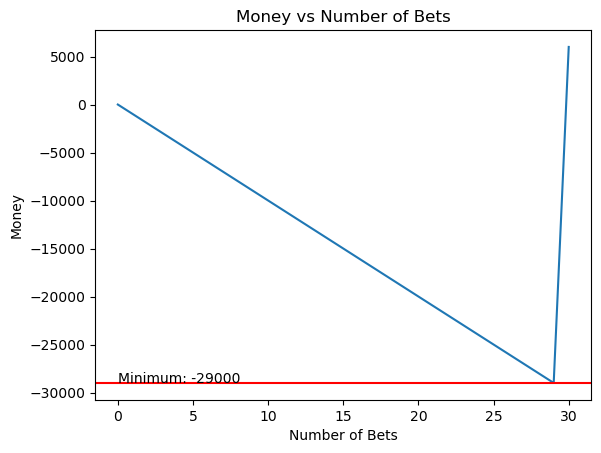

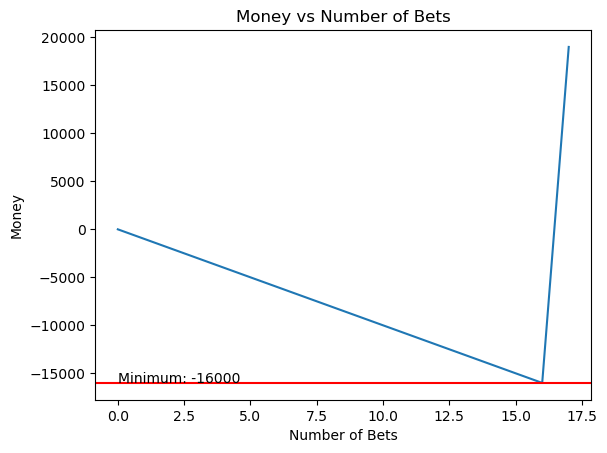

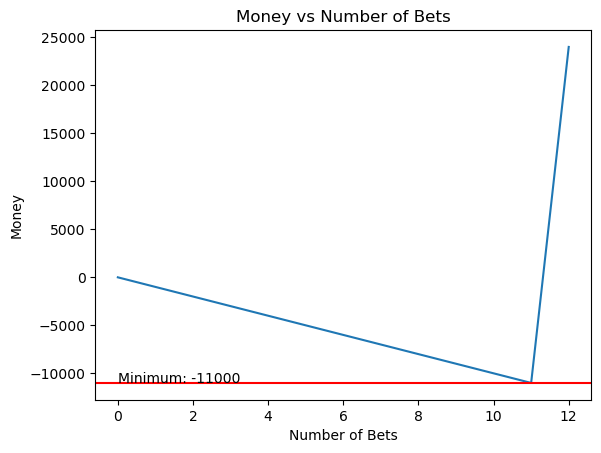

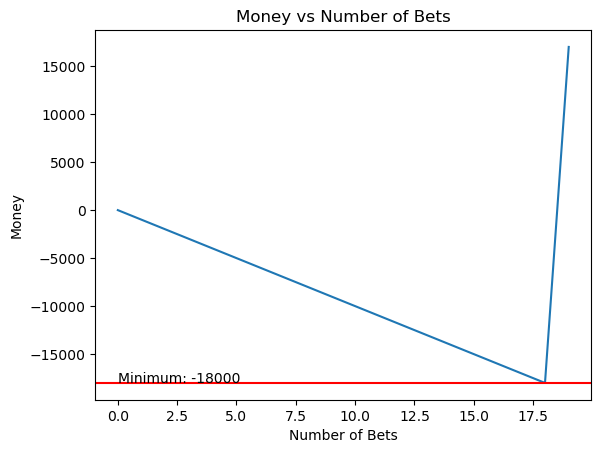

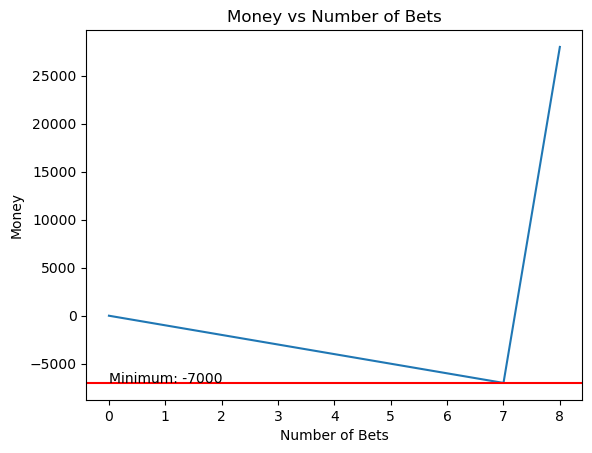

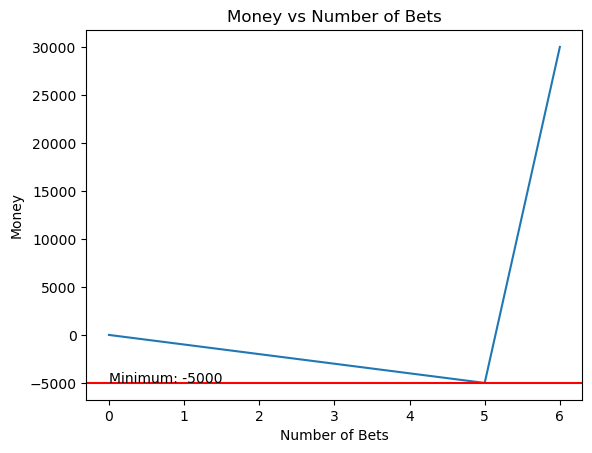

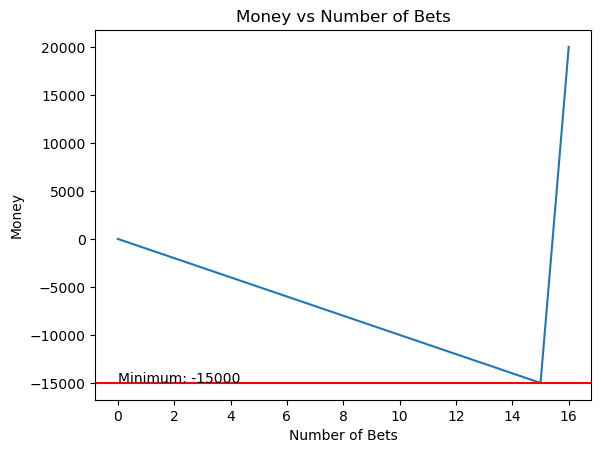

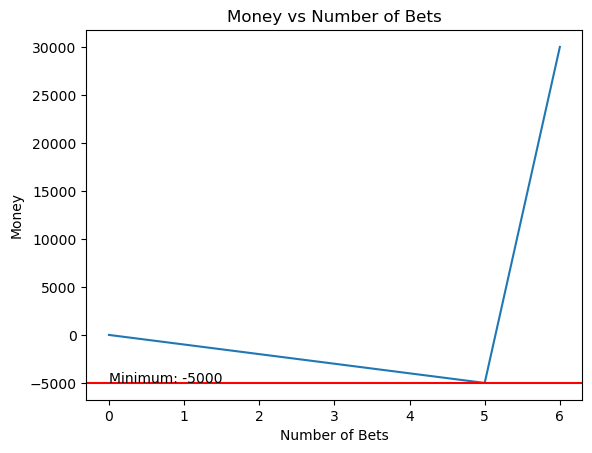

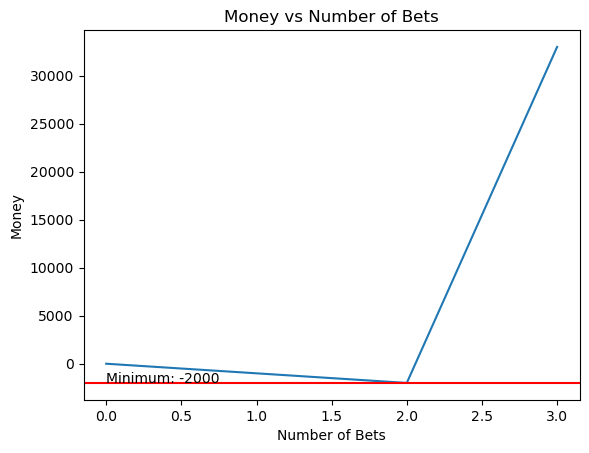

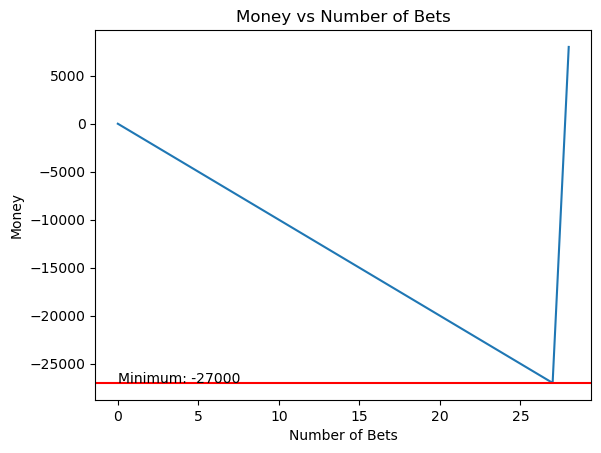

In [75]:
plot_money_histories(successful_histories, UNITS)

## Starting bet = goal, Allowed money lost = -35*goal

In [76]:
money_histories = dict()
for goal in money_goals:
    bet = goal
    tmp_money_histories = simulate_different_goal_money(
                        betting_type = andrucci_betting, 
                        goal_money_list = [goal], 
                        number_histories = 10000,
                        start_bet= bet,
                        money_limit= -35*bet)
    money_histories = money_histories | tmp_money_histories

In [77]:
successful_histories = get_successful_histories(money_histories, money_goals)

In [78]:
for goal in money_goals:
    print(f"For goal {goal} mean money won:")
    print(get_mean_money_won(money_histories, goal))

For goal 10 mean money won:
206.1788486416559
For goal 100 mean money won:
2055.410773875735
For goal 500 mean money won:
10432.244113407016
For goal 1000 mean money won:
20654.019292604502


### Analysis when the goal is to win 10 units

In [79]:
UNITS = 10

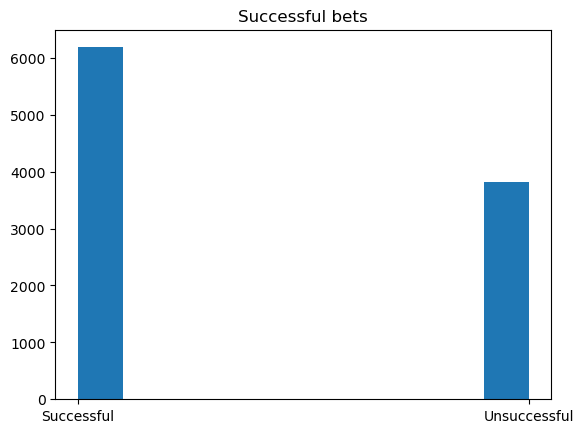

In [80]:
plot_successful_bets(money_histories[UNITS], UNITS)

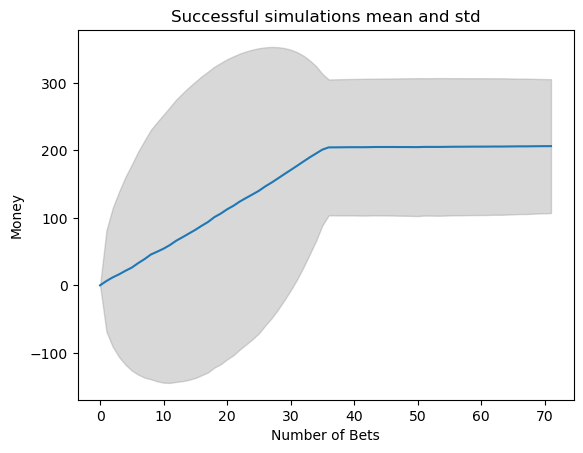

In [81]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

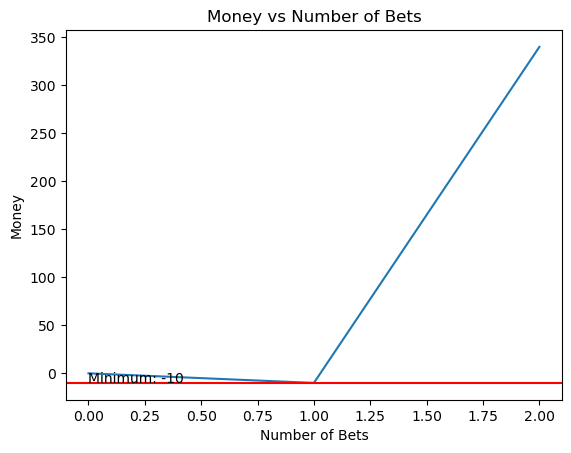

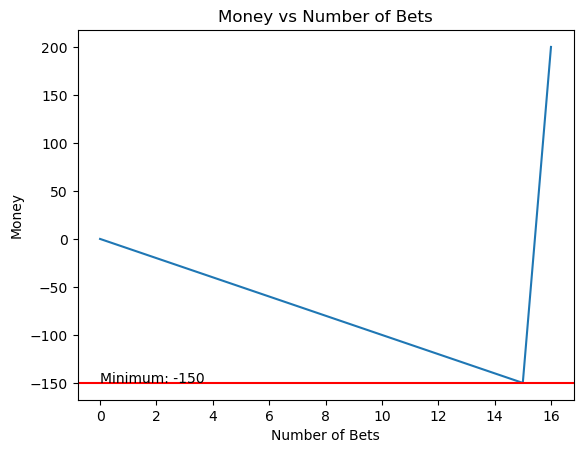

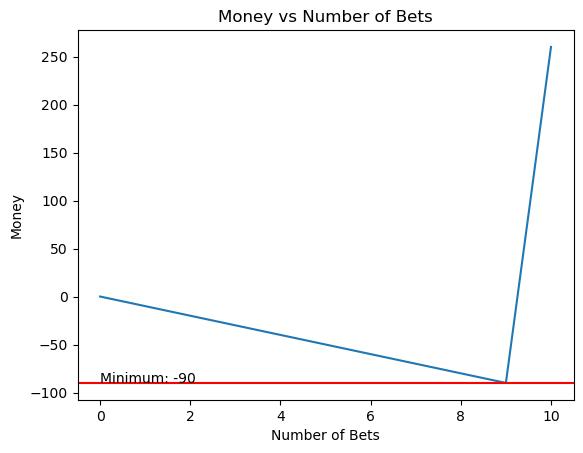

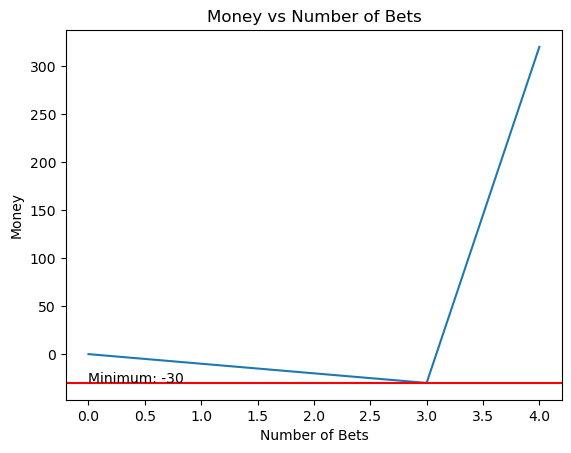

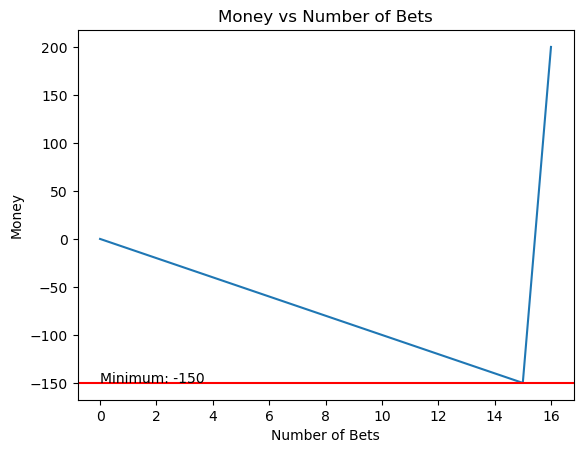

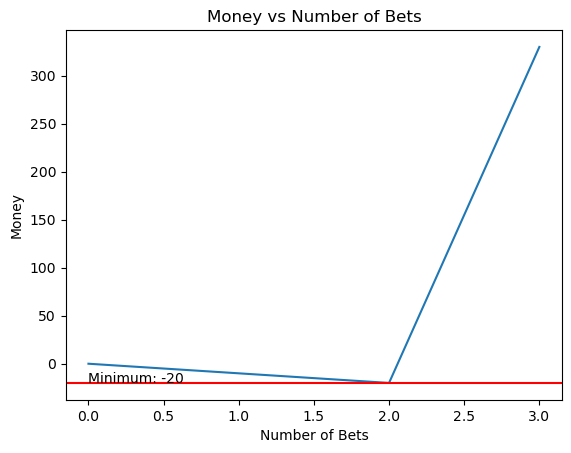

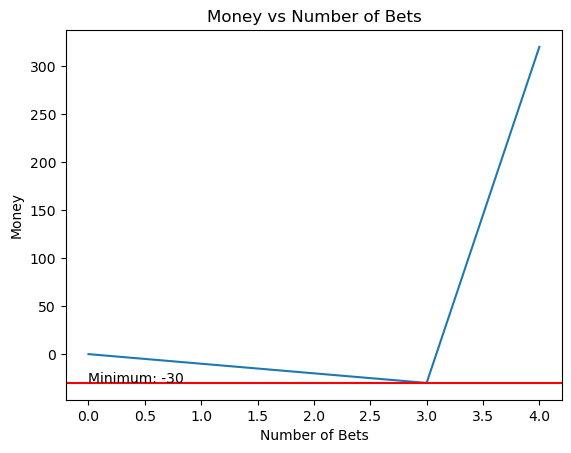

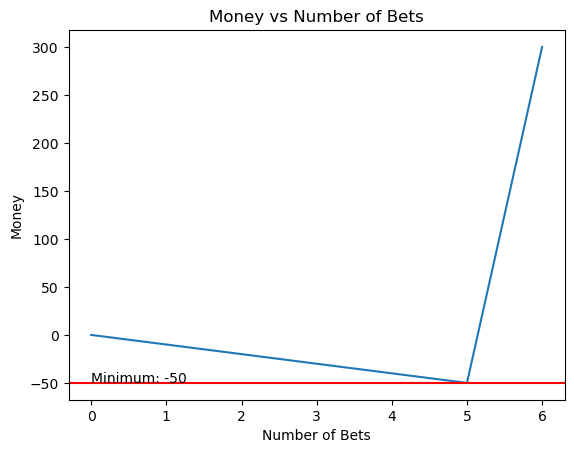

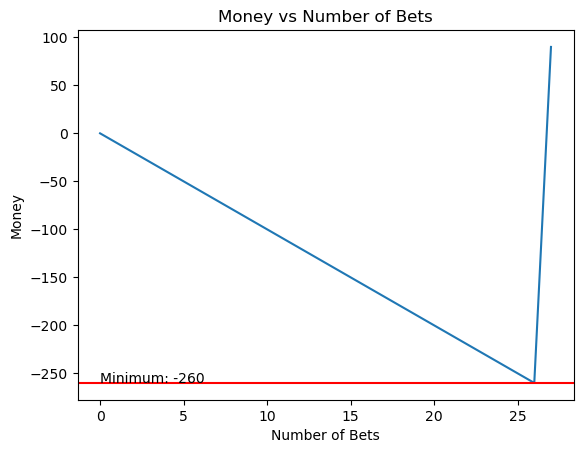

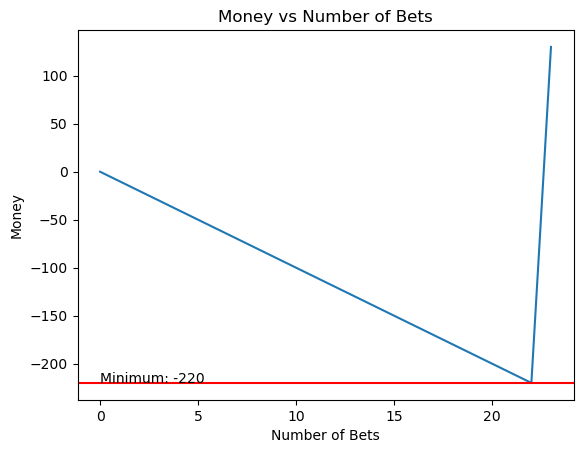

In [82]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 100 units

In [83]:
UNITS = 100

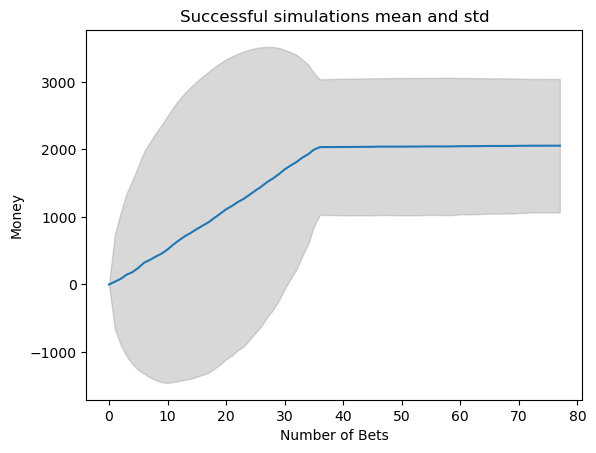

In [84]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

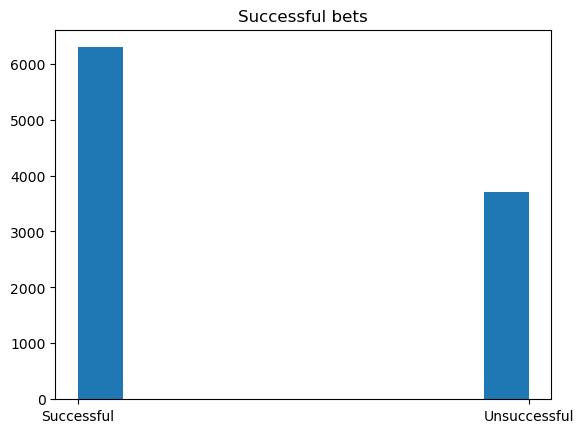

In [85]:
plot_successful_bets(money_histories[UNITS], UNITS)

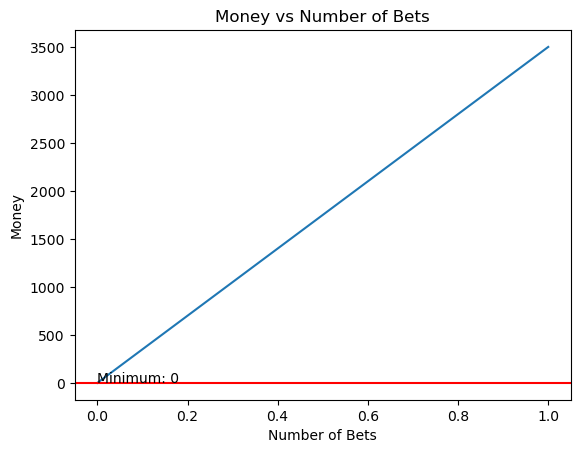

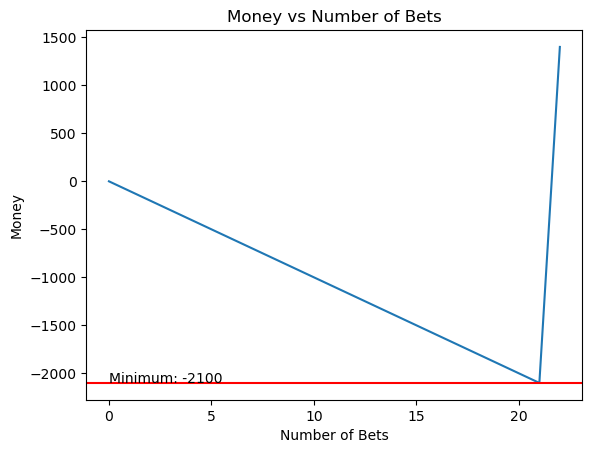

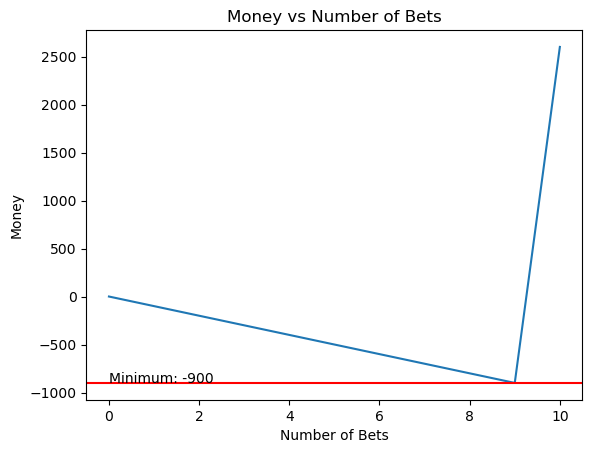

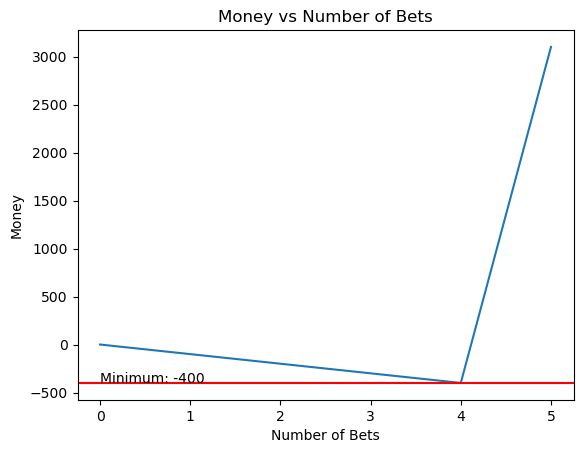

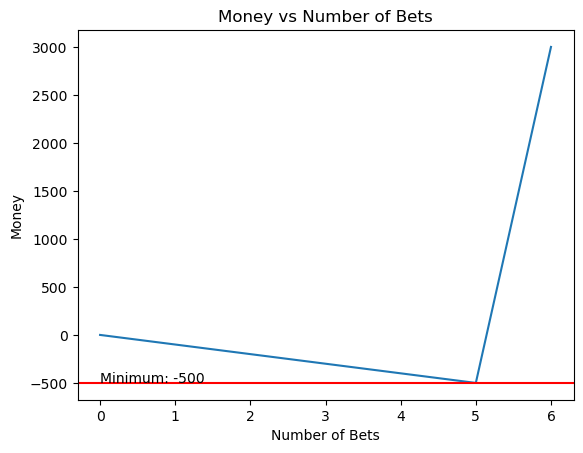

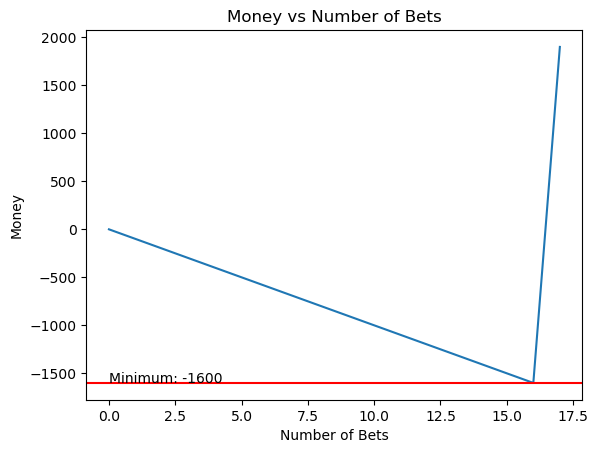

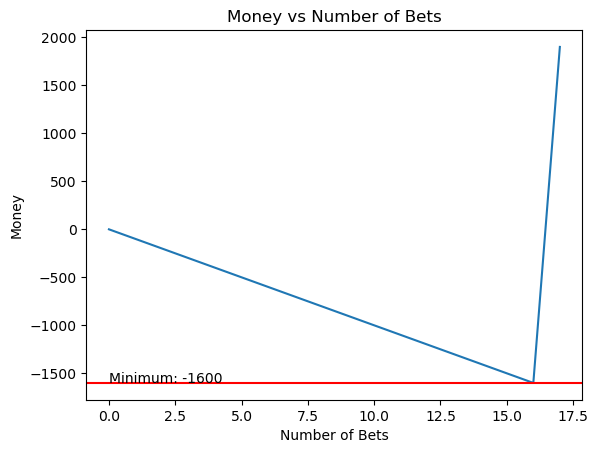

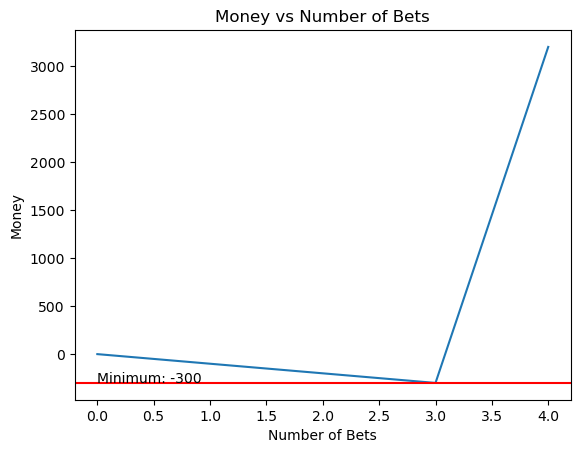

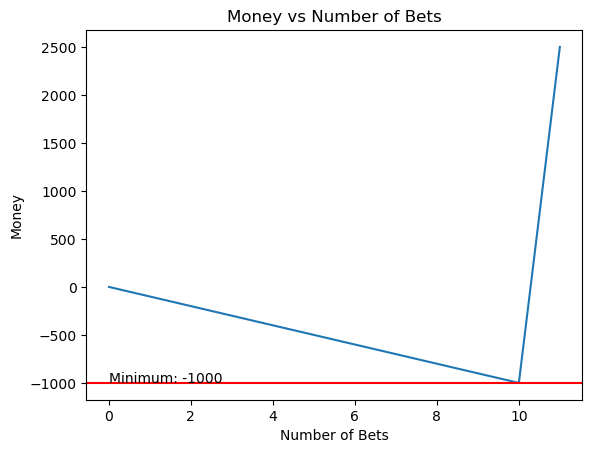

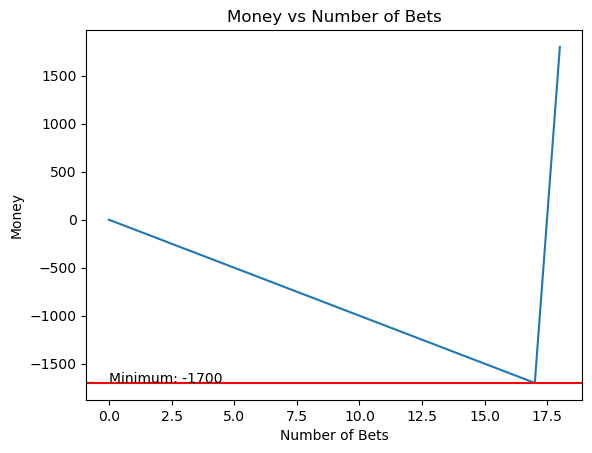

In [86]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 500 units

In [87]:
UNITS = 500

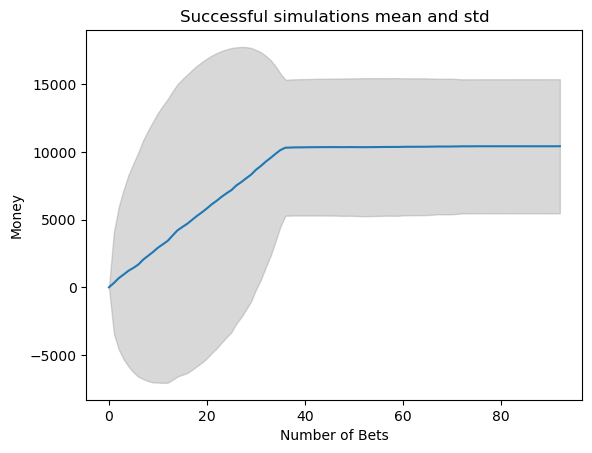

In [88]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

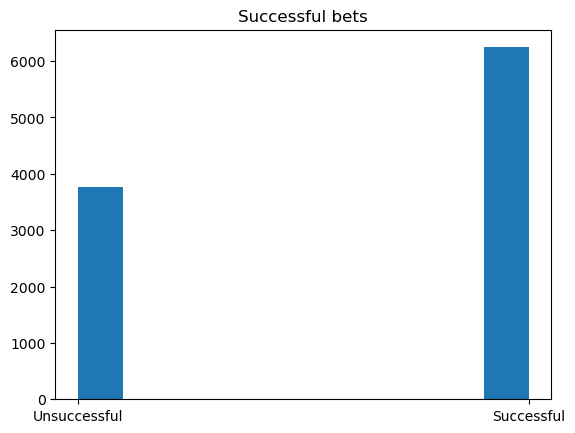

In [89]:
plot_successful_bets(money_histories[UNITS], UNITS)

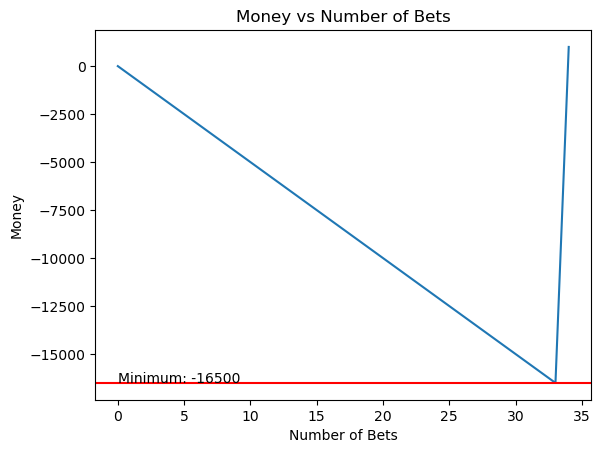

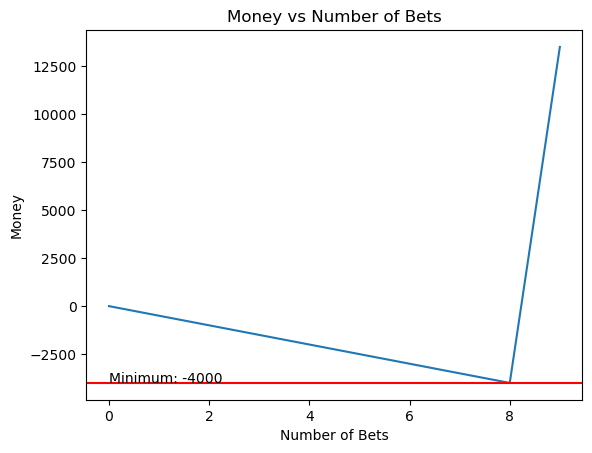

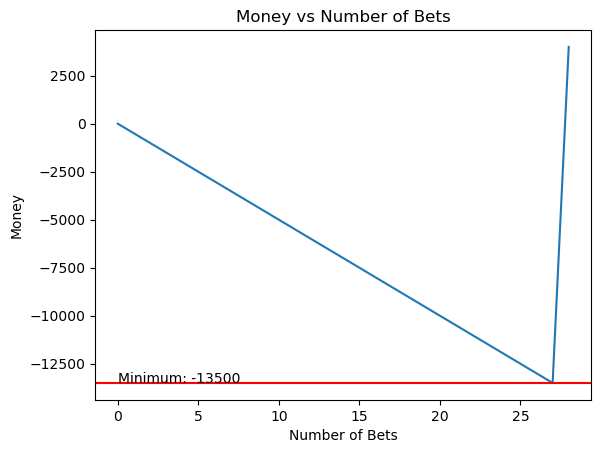

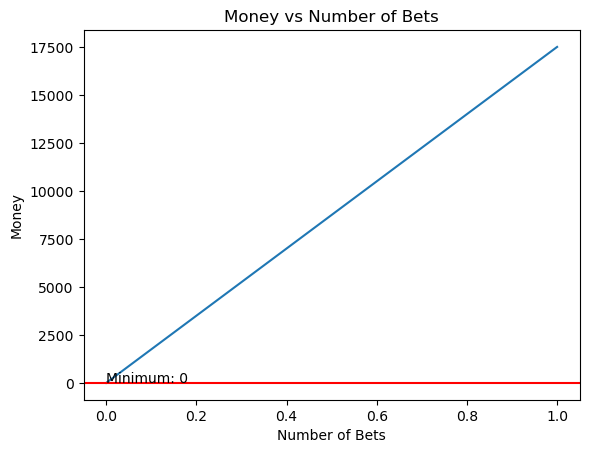

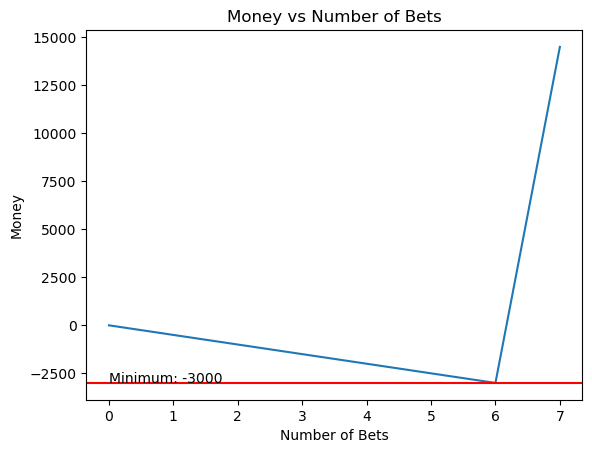

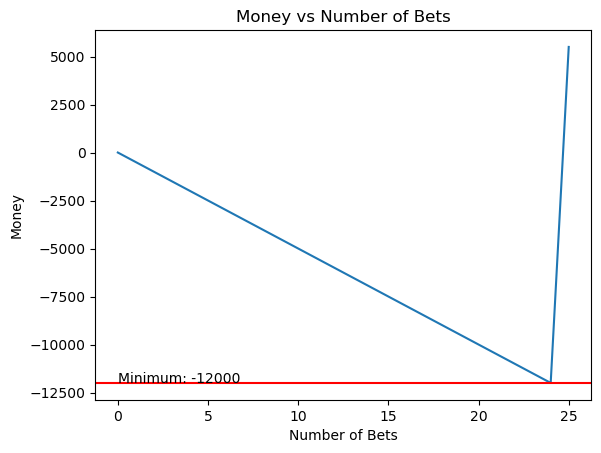

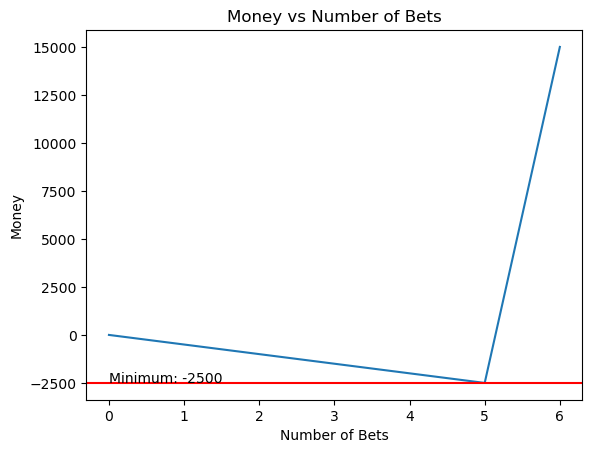

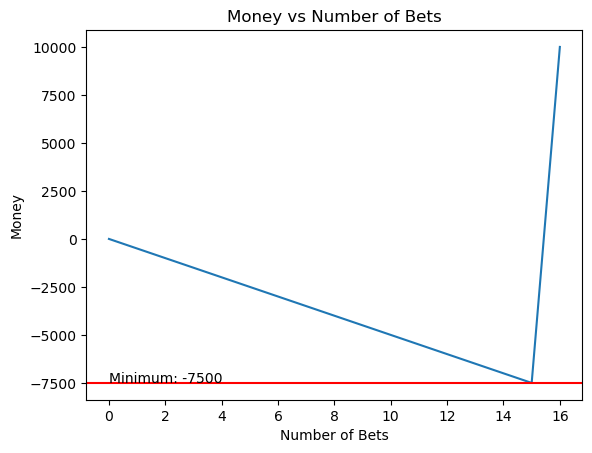

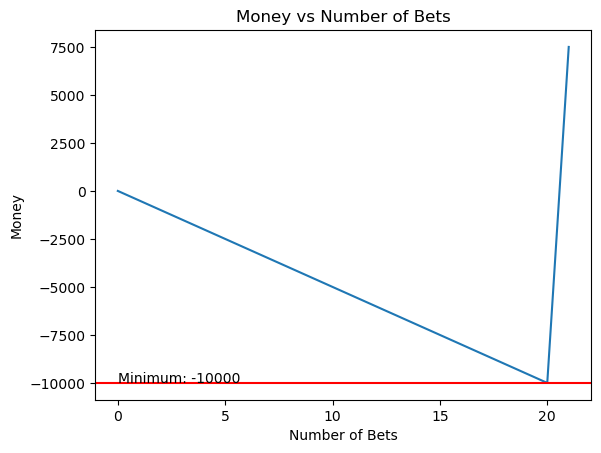

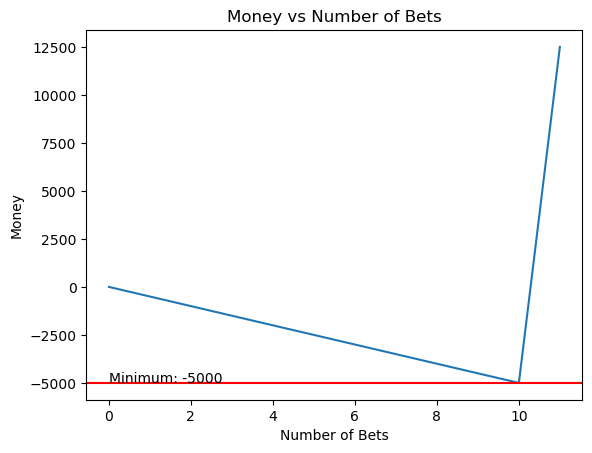

In [90]:
plot_money_histories(successful_histories, UNITS)

### Analysis when the goal is to win 1000 units

In [91]:
UNITS = 1000

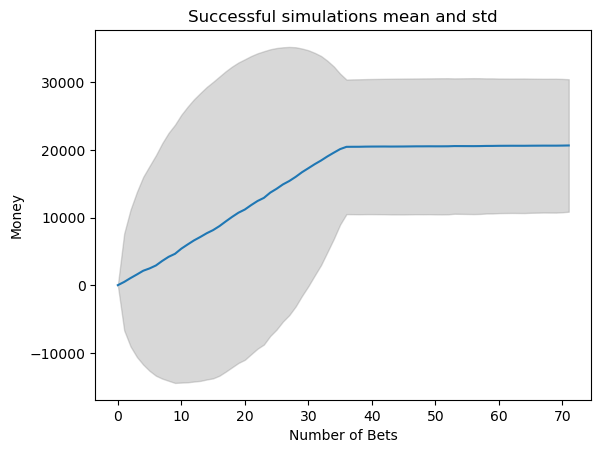

In [92]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(successful_histories, UNITS)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Successful simulations mean and std')

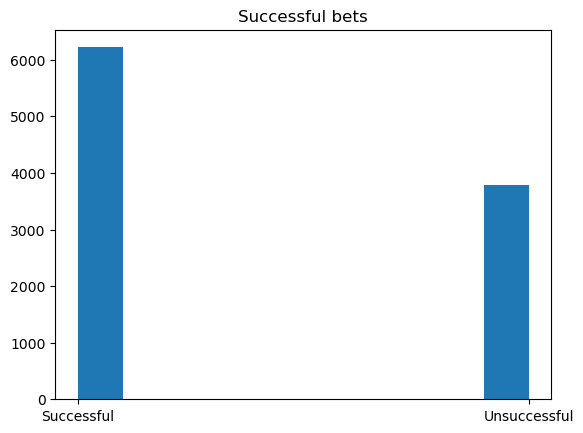

In [93]:
plot_successful_bets(money_histories[UNITS], UNITS)

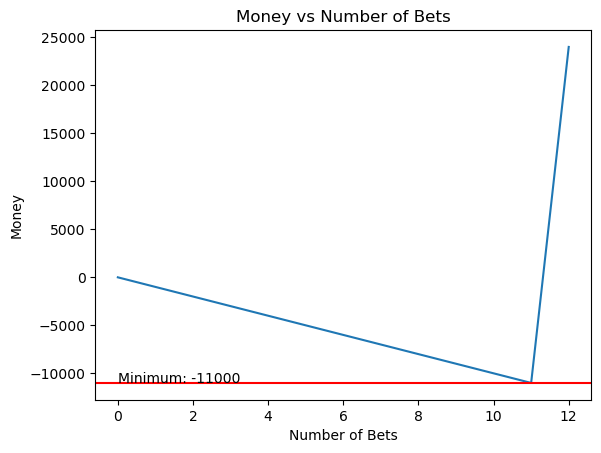

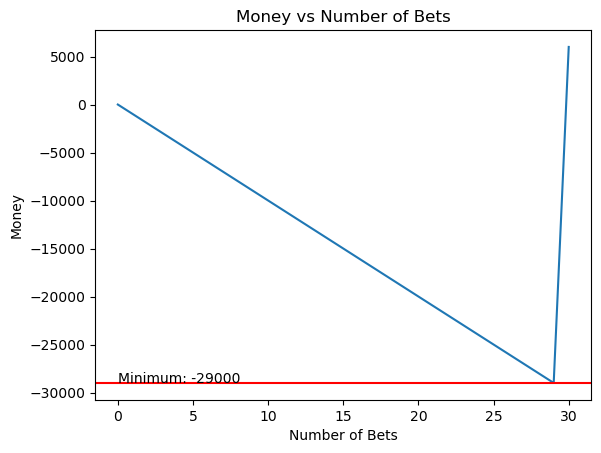

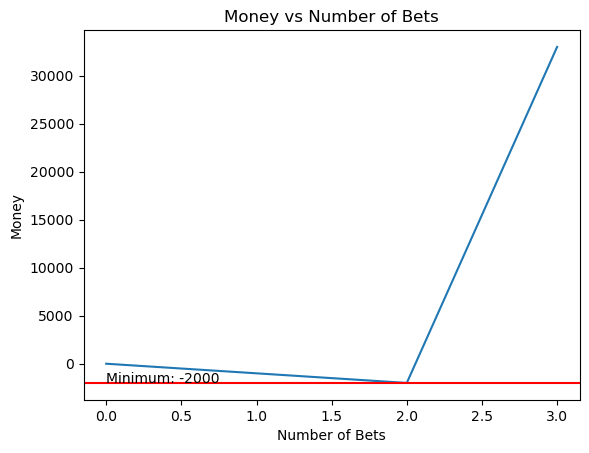

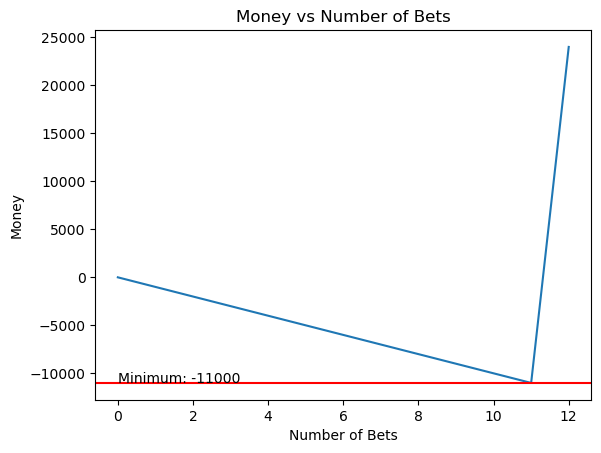

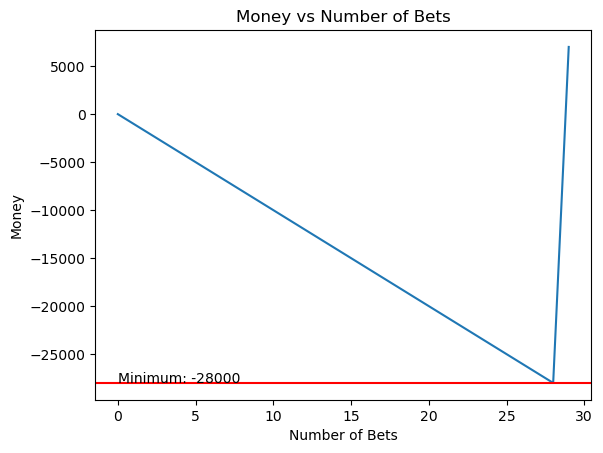

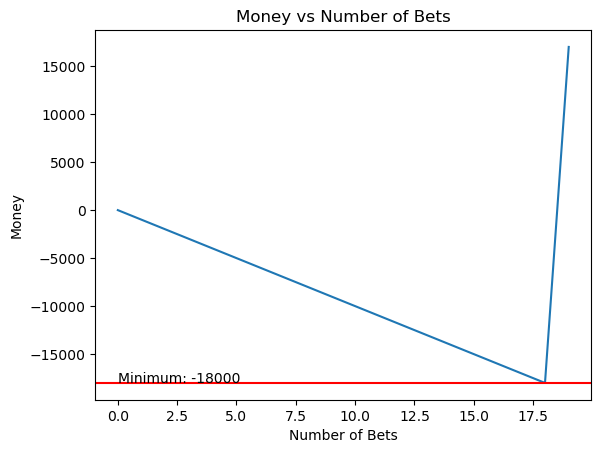

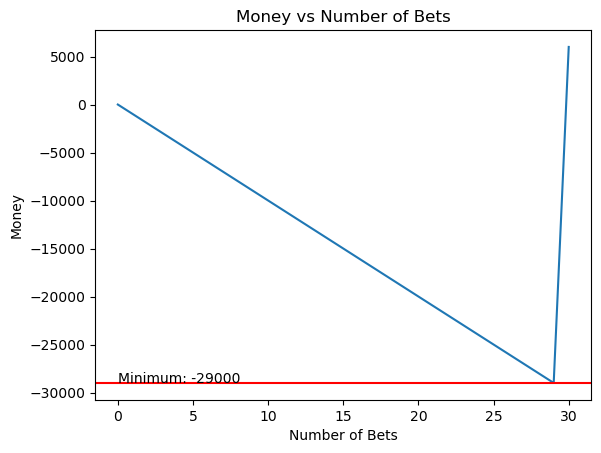

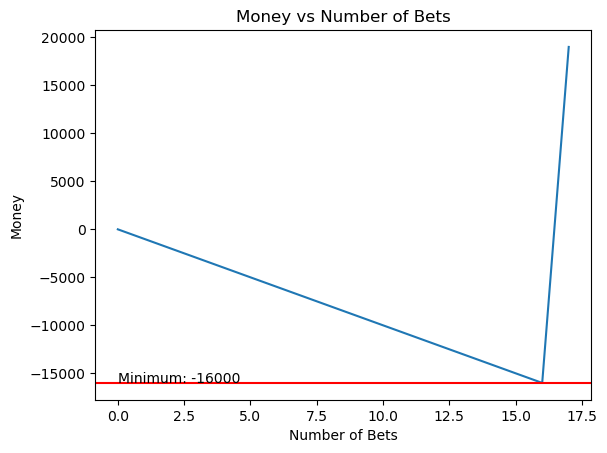

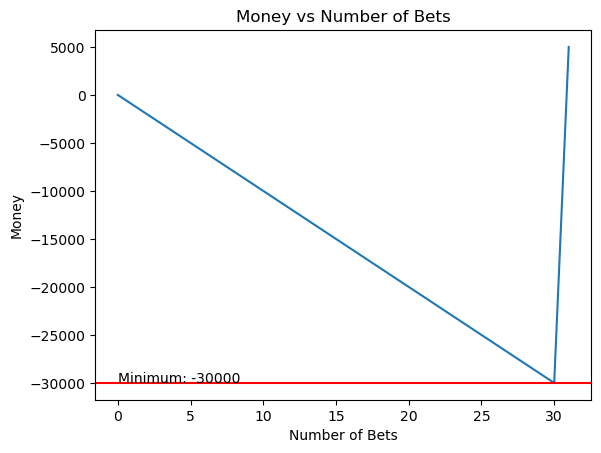

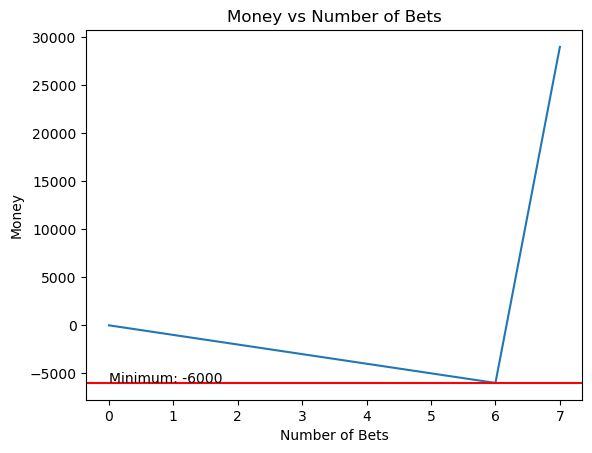

In [94]:
plot_money_histories(successful_histories, UNITS)